# Исследование данных о продаже игр

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-стиля-заголовков" data-toc-modified-id="Изменение-стиля-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение стиля заголовков</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-выпущенных-игр-по-годам" data-toc-modified-id="Распределение-выпущенных-игр-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение выпущенных игр по годам</a></span></li><li><span><a href="#Распределение-продаж-по-платформам" data-toc-modified-id="Распределение-продаж-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение продаж по платформам</a></span></li><li><span><a href="#Выделение-актуального-периода-для-анализа" data-toc-modified-id="Выделение-актуального-периода-для-анализа-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выделение актуального периода для анализа</a></span></li><li><span><a href="#Выделение-лидеров-по-продажам" data-toc-modified-id="Выделение-лидеров-по-продажам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выделение лидеров по продажам</a></span></li><li><span><a href="#Влияние-оценок-пользователей-и-критиков-на-продажи" data-toc-modified-id="Влияние-оценок-пользователей-и-критиков-на-продажи-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Влияние оценок пользователей и критиков на продажи</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [674]:
# Подключаем библиотеки для анализа
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

# Подключаем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Подключаем модуль для работы с файлом
from pathlib import Path

# Подключаем библиотеку для проверки гипотез
import scipy.stats as st

In [675]:
# Получаем строку, содержащую путь к рабочей директории
work_path = Path.cwd()

# сохраним путь к csv файлу в переменной data_path 
data_path = Path(work_path, 'datasets', 'games.csv')
 
# Загружаем данные из csv файла в переменную data
data_games = pd.read_csv(data_path)

# Выведем первые 10 строк
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [676]:
# Ознакомимся с основной информацией
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк и 11 столбцов. Названия столбцов не соответствуют "snake_case"

Типы данных: строки(5) и вещественные числа(4). Также сразу можно отметить, что для столбцов `Year_of_Release` и `User_Score` задан неверный тип данных.

Согласно документации к данным каждая колонка имеет следующее описание:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах отлично от количества строк в таблице, т.е. в данных есть выбросы.

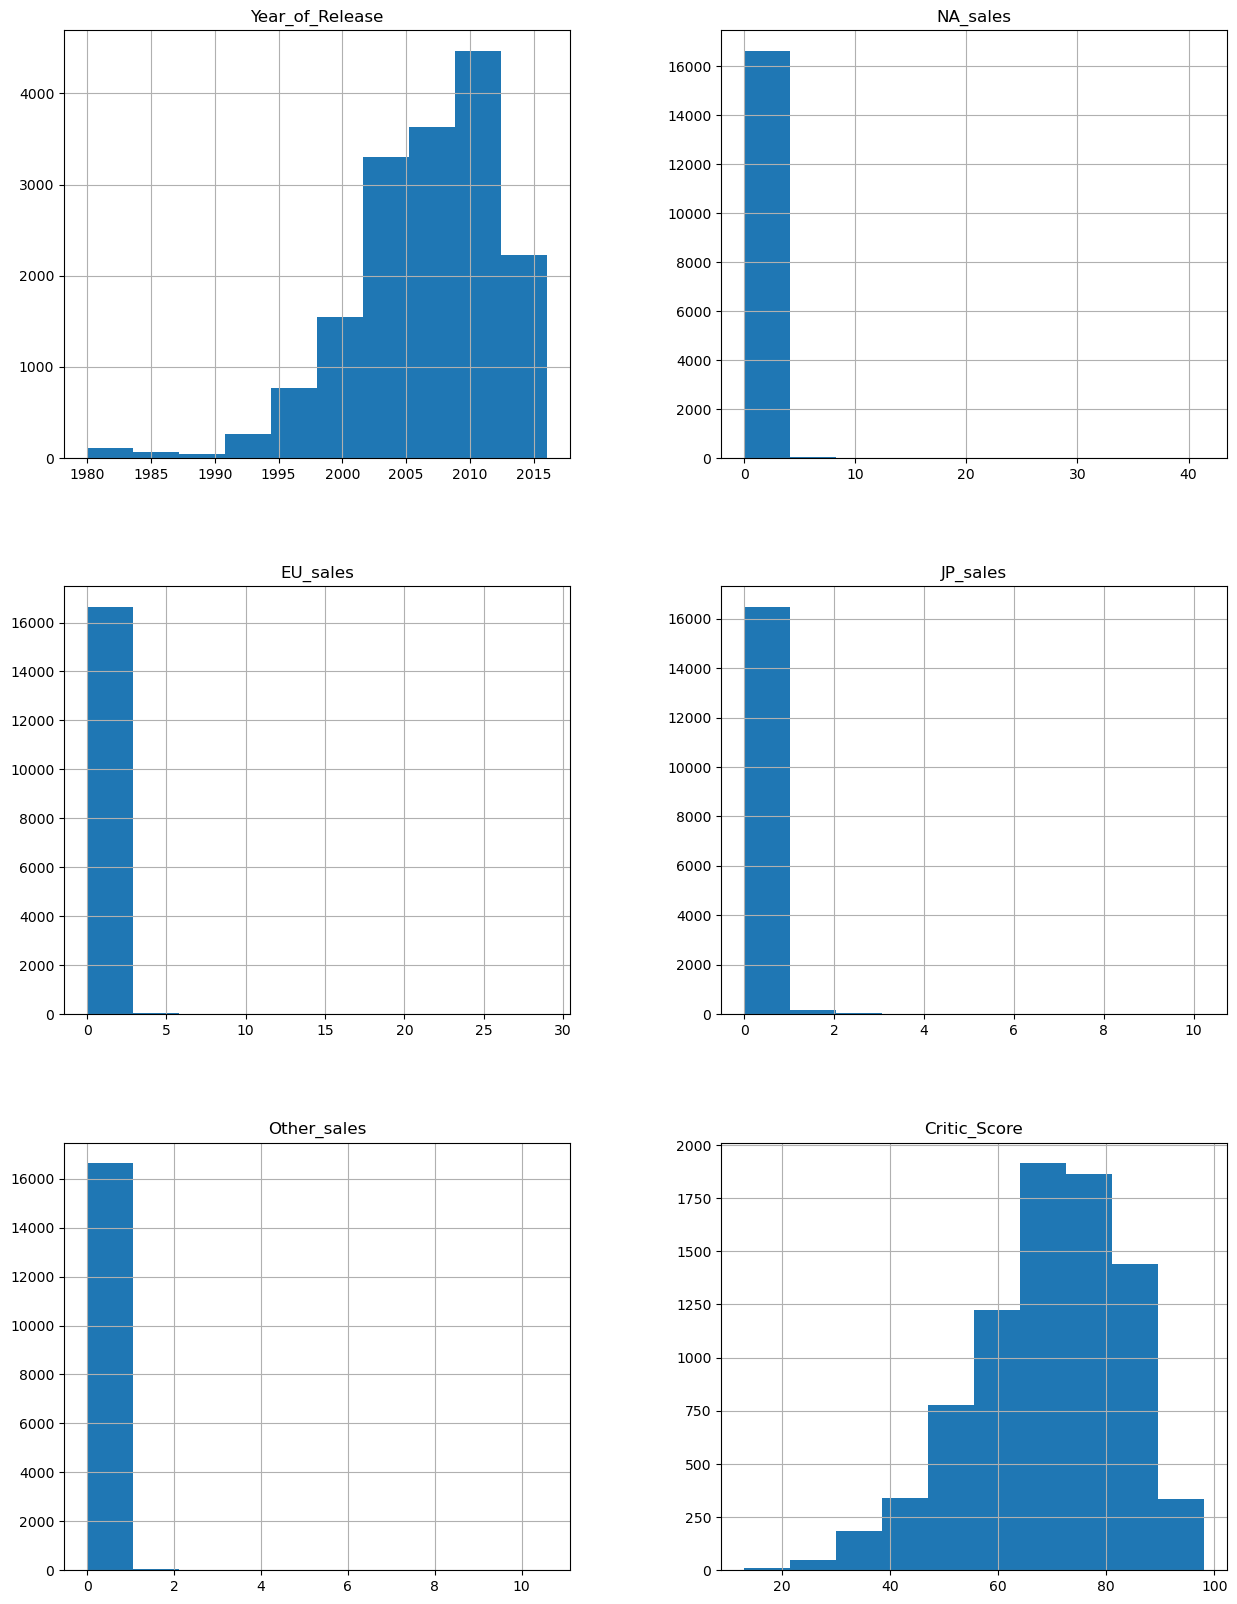

In [677]:
# Построим гистограммы для всех параметров
data_games.hist(figsize=(15, 20));

- Данные о продажах во всех регионах имеют выбросы, т.к. гистограммы асимметричны и имеют положительную скошенность;
- Оценки критиков и год выпуска игры асимметричны и имеют отрицательную скошенность;
- Нет гистограммы с оценками пользователей, т.к. неверно задан тип данных.

**Выводы**

В каждой строке таблицы — данные о продаже игр. Часть колонок описывает саму игру (название, платформа, год выпуска и жанр), другая часть рассказывают о продажах в разных регионах и рейтингах (экспертов, пользователей и организации ESRB).

Предварительно можно утверждать, что данных достаточно для выявления закономерностей и проверки гипотез. Однако встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Изменение стиля заголовков

На этапе обзора данных для названий столбцов было выявлено несоответствие стилю "snake_case"

In [678]:
# Получим заголовки столбцов таблицы
data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [679]:
# Скорректируем стиль заголовков
data_games.columns = data_games.columns.str.lower()

In [680]:
# Проверим результат
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Заголовки столбцов таблицы приведены к правильному стилю "snake_case"

### Обработка пропусков

In [681]:
# Рассчитаем количество пропусков по каждому столбцу
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [682]:
# создадим вспомогательную функцию для визуализации пропусков
def pass_value_barh(df):
    try:
        (
            (df.isna().mean() * 100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space')
            .plot(kind = 'barh', 
                  figsize = (19, 5),
                  legend = False, 
                  fontsize = 16,
                  color = 'orange',
                  alpha = 0.6
                 )
            .set_title('Количество пропусков, %' + "\n", fontsize = 22, alpha = 0.6)
        );    
    except:
        print('пропусков не осталось или произошла ошибка в первой части функции')

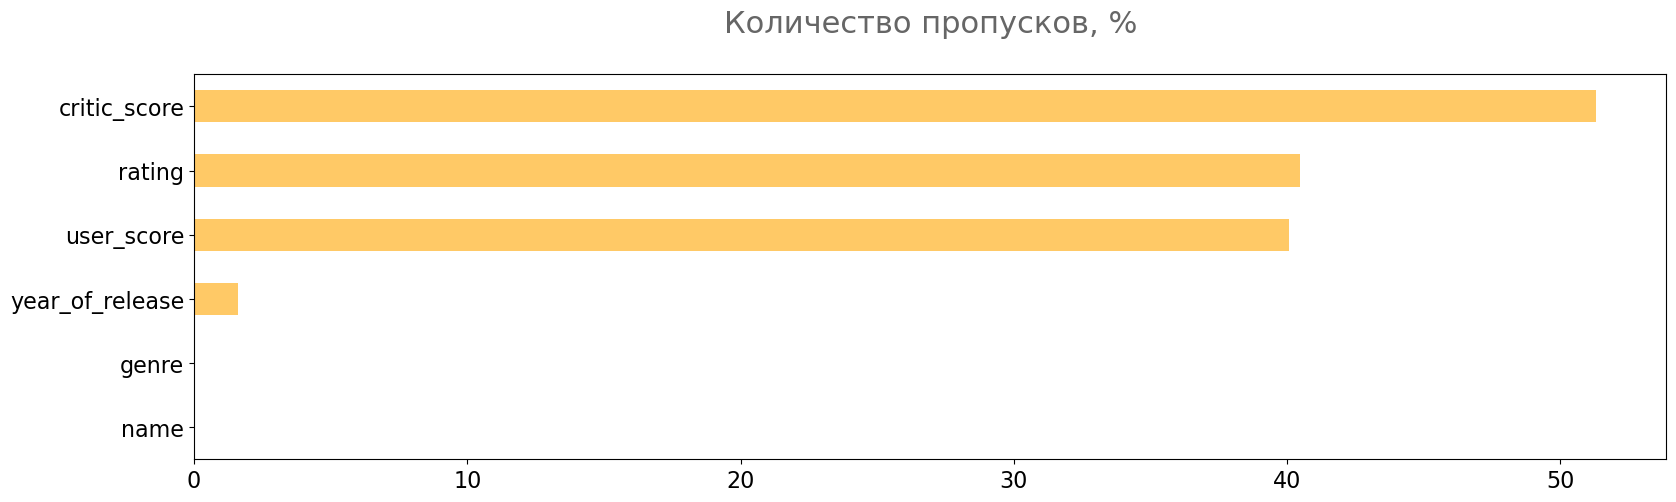

In [683]:
pass_value_barh(data_games)

В 6 из 11 столбцов обнаружены пропуски, больше всего - в трех столбцах с оценками (от 40 до 50%). 

Необходимо выявить природу пропусков и по возможности заполнить.

In [684]:
# Создадим вспомогательную функцию для определения количества пропусков (абсолютное и относительное значение)
def data_gaps(data, column):
    print('Пропусков в столбце', column, data[column].isna().sum(), 'шт., что составляет', 
      round(data[column].isna().mean() * 100, 2), '%')

**`name` и `genre`**

В столбцах с названием игры и жанром малое количество пропусков, рассмотрим данные столбцы вместе

In [685]:
# определим количество пропусков в столбце
data_gaps(data_games, 'name')
data_gaps(data_games, 'genre')

Пропусков в столбце name 2 шт., что составляет 0.01 %
Пропусков в столбце genre 2 шт., что составляет 0.01 %


In [686]:
# рассмотрим данные строки
data_games[data_games['name'].isna() & data_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно в данных строках отсутствуют данные о названии игры, ее жанре и всевозможных оценках.

**Выводы**:
- *количество пропусков*: 2 - незначительные пропуски
- *причины, по которым могли возникнуть пропуски*: 
  * ошибка пользователя при заведении данных;
  * на момент заведения не было официального названия;
  * данные утрачены (1993 год)
- *как исправить*: т.к. игра 1993 года и имеет мало продаж, удалим данные строки, которые не пригодятся в дальнейшем анализе.

In [687]:
# Удаление строк
data_games = data_games.dropna(subset=['name'])

**`year_of_release`**

In [688]:
# определим количество пропусков в столбце
data_gaps(data_games, 'year_of_release')

Пропусков в столбце year_of_release 269 шт., что составляет 1.61 %


In [689]:
data_games[data_games['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14769,Super Duper Sumos,GBA,NaN,Action,0.02,0.01,0.00,0.00,57.0,tbd,E
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+
5800,Slot Machine,2600,NaN,Action,0.29,0.02,0.00,0.00,NaN,NaN,NaN
2773,WarioWare: Twisted!,GBA,NaN,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
13874,Luxor: Pharaoh's Challenge,Wii,NaN,Puzzle,0.01,0.02,0.00,0.00,NaN,tbd,E
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9380,Transworld Surf,XB,NaN,Sports,0.10,0.03,0.00,0.00,76.0,tbd,T
14350,Bikkuriman Daijiten,DS,NaN,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
12718,Flip's Twisted World,Wii,NaN,Platform,0.05,0.00,0.00,0.00,47.0,tbd,E
15081,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN


**Выводы**:
- *количество пропусков*: 269 (1,61%) - незначительные пропуски
- *причины, по которым могли возникнуть пропуски*: 
  * ошибка пользователя при заведении данных (например, часть дат заведена в названии);
  * официальная даты выхода по игре не определена;
  * ошибка выгрузки данных;
- *как исправить*: т.к. даты выпуска игр невозможно получить из сторонних источников и нельзя достоверно знать, что в названиях указаны верные года (где есть), то лучше удалить данные строки, т.к. данные неинформативны для анализа

In [690]:
# Удаление строк
data_games = data_games.dropna(subset=['year_of_release'])

**`critic_score`**

In [691]:
# определим количество пропусков в столбце
data_gaps(data_games, 'critic_score')

Пропусков в столбце critic_score 8461 шт., что составляет 51.45 %


In [692]:
# Рассмотрим строки с пропусками
data_games[data_games['critic_score'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2636,Mario & Sonic at the Sochi 2014 Olympic Winter...,WiiU,2013.0,Sports,0.37,0.22,0.13,0.06,NaN,NaN,NaN
13751,Call of Duty: Modern Warfare Trilogy,X360,2016.0,Shooter,0.02,0.02,0.00,0.00,NaN,tbd,M
11266,Monster Jam: Urban Assault,PSP,2008.0,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E
6944,Are You Smarter than a 5th Grader? Game Time,DS,2009.0,Puzzle,0.22,0.00,0.00,0.02,NaN,tbd,E
16595,Rabbids Invasion: The Interactive TV Show,XOne,2014.0,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
15593,Meiji Toukyou Renka,PSP,2013.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999.0,Role-Playing,0.00,0.00,0.18,0.00,NaN,NaN,NaN
7083,Bicycle Casino 2005,XB,2004.0,Misc,0.17,0.05,0.00,0.01,NaN,NaN,NaN
7363,Naruto: Clash of Ninja (JP sales),GC,2003.0,Fighting,0.00,0.00,0.21,0.01,NaN,NaN,NaN
15558,Heroes VS,PSP,2013.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Пропусков больше половины значений - удалить строки нельзя. В большинстве строк пропуски по оценкам экспертов пересекаются с пропусками по оценкам пользователей и возрастному ограничнению. Для заполнения пропусков можно использовать медианную оценку по жанру игры, рассмотрим подробнее.

In [693]:
# Создадим вспомогательную функцию для получения количества пропусков по любому столбцу в разрезе (например, по жанру)
def get_gaps_column_section(data, query, section):
    gaps_column_section = (
        data[section]
        .value_counts()
        .to_frame()
        .rename(columns={section:'cnt_games'})
    )
    gaps_column_section['gaps'] = (
        data
        .query(query)[section]
        .value_counts()
        .to_frame()
    )
    gaps_column_section['gaps, %'] = round(gaps_column_section['gaps'] / gaps_column_section['cnt_games'] * 100, 2)
    
    return (
        print('Среднее значение пропусков по каждому', section, round(gaps_column_section['gaps, %'].mean(), 2), '%'), 
        gaps_column_section
           )

Среднее значение пропусков по каждому genre 52.67 %


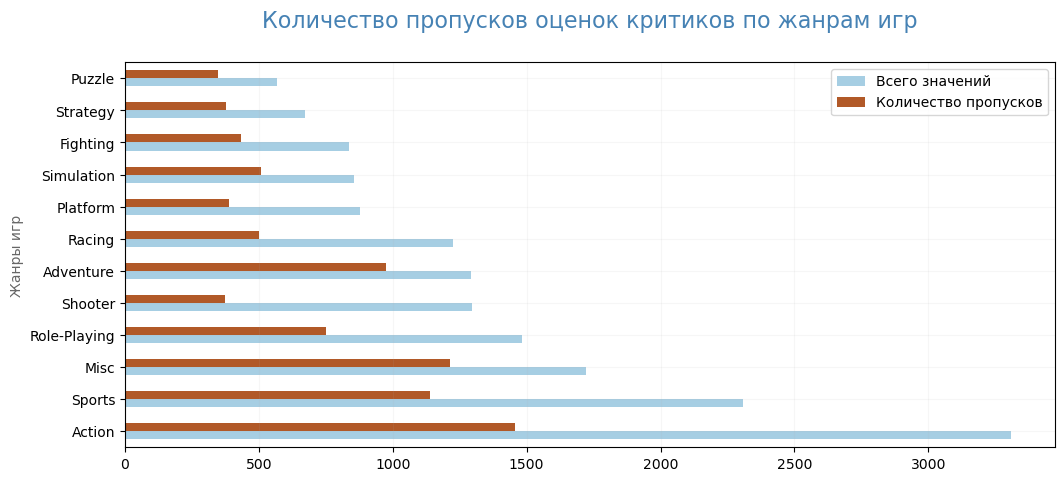

In [694]:
# Определим количество и % пропусков по жанрам
mean_genre, critic_score_genre = get_gaps_column_section(data_games, 'critic_score.isna()', 'genre')

critic_score_genre.plot(y=['cnt_games', 'gaps'],
                        kind='barh',
                        figsize=(12, 5),
                        colormap='Paired',
                        label=['Всего значений', 'Количество пропусков']
                       );
plt.title('Количество пропусков оценок критиков по жанрам игр' + '\n', fontsize = 16, color = 'SteelBlue')
plt.ylabel('Жанры игр', alpha=0.6)
plt.grid(alpha=0.1)
plt.show()

Пропуски по жанрам составляют в среднем 53%, поэтому заполнение медианным значением будет некорректно для дальнейшего исследования.

Рассмотрим количество проупсков в разрезе даты выпуска:

Среднее значение пропусков по каждому year_of_release 73.66 %


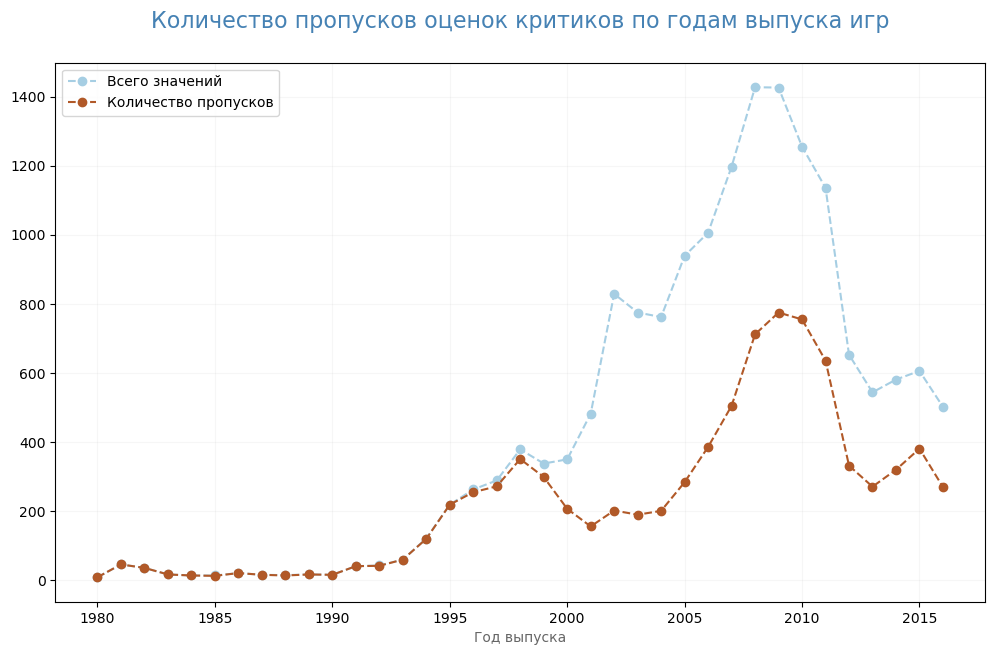

In [695]:
mean_year, critic_score_year = get_gaps_column_section(data_games, 'critic_score.isna()', 'year_of_release')

critic_score_year.sort_index().plot(y=['cnt_games', 'gaps'],
                                    figsize=(12, 7),
                                    style='--o',
                                    colormap='Paired',
                                    label=['Всего значений', 'Количество пропусков']
                                   );

plt.title('Количество пропусков оценок критиков по годам выпуска игр' + '\n', fontsize = 16, color = 'SteelBlue')
plt.xlabel('Год выпуска', alpha=0.6)
plt.grid(alpha=0.1)
plt.show()

За период с 1980 по 1999 год оценок практически нет, что можно связать с тем, что основным рейтингом является сервис Metacritic, который появился в 2001 году. С 2000 года только половина игр имеют оценки критиков, вероятно это связано с тем, что эти игры не обрели популярности.

In [696]:
# Получим описательную статистику по количеству продаж, где есть пропуски с оценками критиков
data_games.query('critic_score.isna()')[['na_sales', 'eu_sales', 'eu_sales', 'other_sales']].describe()

,na_sales,eu_sales,eu_sales,other_sales
count,8461.000000,8461.000000,8461.000000,8461.000000
mean,0.178603,0.085671,0.085671,0.023684
std,0.719761,0.322860,0.322860,0.089195
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,0.000000,0.000000
75%,0.140000,0.050000,0.050000,0.020000
max,29.080000,10.950000,10.950000,2.740000


Как и предполагалось, большинство игр просто не получили признание в игровой индустрии - это доказывает нулевое медианное значение и низкое значение 3 квартиля.

**Выводы**:
- *количество пропусков*: 8461 (51.45%) - значимые пропуски
- *причины, по которым могли возникнуть пропуски*: 
  * отсутствие сервисов для оценки игр, т.к. с 1980 по 1993 год выпускалось мало игр, а основной агрегатор появился в 2001;
  * ошибка пользователя при заведении;
  * ошибка интеграции (если данные выгружаются с основного сайта);
  * игра не была оценена экспертами (по многим строкам с пропусками низкое количество продаж);
  * игра вышла недавно и еще не получила официальную оценку;
- *как исправить*: 
  * обратиться к коллегам, отвечающим за заполнение и выгрузку данных, для устранения недочетов;
  * т.к. заполнение медианным значением по жанру не является корректным и пропусков слишком большое количество, логичнее всего заполнить значением по умолчанию, например, "-1".

In [697]:
data_games['critic_score'] = data_games['critic_score'].fillna(-1)

**`user_score`**

In [698]:
# определим количество пропусков в столбце
data_gaps(data_games, 'user_score')

Пропусков в столбце user_score 6605 шт., что составляет 40.17 %


In [699]:
# Рассмотрим строки с пропусками
data_games[data_games['user_score'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15935,Final Fantasy XI: All-In-One Pack 2006,X360,2006.0,Role-Playing,0.00,0.00,0.02,0.00,-1.0,NaN,NaN
8103,Soccer Tsuku Tokudai Gou: J-League Pro Soccer ...,DC,2000.0,Sports,0.00,0.00,0.18,0.00,-1.0,NaN,NaN
5368,The Fairly Odd Parents: Shadow Showdown,GBA,2004.0,Platform,0.25,0.09,0.00,0.01,-1.0,NaN,NaN
8820,3rd Super Robot Wars Z: Tengoku-Hen,PS3,2015.0,Action,0.00,0.00,0.15,0.00,-1.0,NaN,NaN
4644,X-Men vs. Street Fighter,PS,1997.0,Fighting,0.16,0.11,0.12,0.03,-1.0,NaN,NaN
6677,NBA Showtime: NBA on NBC,N64,1999.0,Sports,0.23,0.02,0.00,0.00,-1.0,NaN,NaN
8417,Nobunaga no Yabou: Tenshoki,SNES,1996.0,Strategy,0.00,0.00,0.17,0.00,-1.0,NaN,NaN
3496,Mobile Suit Gundam: Giren no Yabou- Zeon no Keifu,PS,2000.0,Strategy,0.00,0.00,0.54,0.04,-1.0,NaN,NaN
8751,Bust-A-Move Bash!,Wii,2007.0,Puzzle,0.13,0.01,0.00,0.01,-1.0,NaN,NaN
15266,Shippuu Mahou Daisakusen: Kingdom-Grandprix,SAT,1996.0,Shooter,0.00,0.00,0.02,0.00,-1.0,NaN,NaN


Как отмечалось ранее, пропуски оценок критиков часто пересекаются с пропусками пользовательских оценок. Рассмотрим сколько таких случаев:

In [700]:
# Рассмотрим строки с пропусками
len(data_games.query('critic_score == -1 and user_score.isna()'))

6572

Таким образом, пропуски по оценкам экспертов и пользователей почти в 100% случаев совпадают, что говорит о схожей природе ошибок.

При просмотре оценок пользователей выявлена аббревиатура *tbd*, что часто в игровой индустрии расшифровывается как *To Be Determined* - "Будет определено" или *To Be Discussed* - "Подлежит обсуждению". Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [701]:
# Рассчитаем сколько таких значений
print('Пропусков в столбце:', len(data_games.query('user_score == "tbd"')), 'шт., что составляет', 
      round(len(data_games.query('user_score == "tbd"')) / len(data_games) * 100, 2),'%')

Пропусков в столбце: 2376 шт., что составляет 14.45 %


Среднее значение пропусков по каждому year_of_release 12.77 %


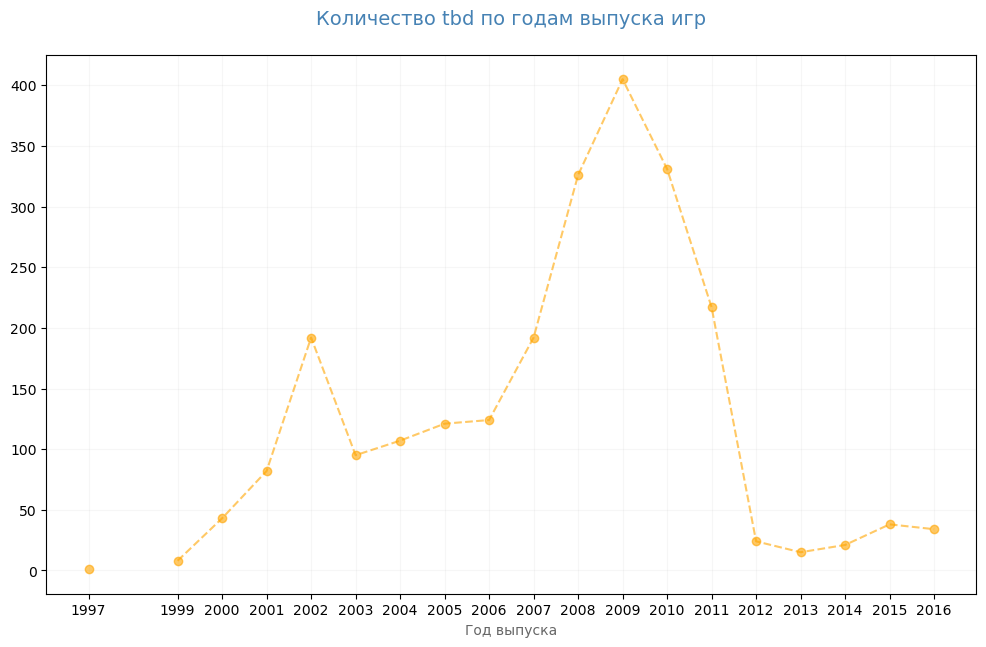

In [702]:
# Рассчитаем сколько таких значений по годам
mean_tbd, tbd_year = get_gaps_column_section(data_games, 'user_score == "tbd"', 'year_of_release')

tbd_year.sort_index().plot(y='gaps',
                           figsize=(12, 7),
                           style='--o',
                           legend=False,
                           color='orange',
                           alpha=0.6)

plt.title('Количество tbd по годам выпуска игр' + '\n', fontsize = 14, color = 'SteelBlue')
plt.xlabel('Год выпуска', alpha=0.6)
plt.xticks(data_games.query('user_score == "tbd"')['year_of_release'].unique())
plt.grid(alpha=0.1)
plt.show()

Если бы данная аббревиатура встречалась больше в последних годах, то можно было бы предположить, что *tbd* - это "будет определено". Однако пик приходится на 2007-1011 года, поэтому вероятнее значение "подлежит обсуждению", т.е. игра неоценена.

**Выводы**:
- *количество пропусков* 8981 (54,62%), где:
  * 6605 (40,17%) - явные пропуски;
  * 2376 (14,45%) - неявные пропуски в виде 'tbd'
- *причины, по которым могли возникнуть пропуски*: 
  * отсутствие сервисов для оценки игр, т.к. с 1980 по 1993 год выпускалось мало игр;
  * ошибка пользователя при заведении;
  * ошибка интеграции (если данные выгружаются с основного сайта);
  * игра не была оценена пользователями (например, пропуски со значением 'tbd');
  * игра вышла недавно и еще не получила официальную оценку;
- *как исправить*: аналогично заполнению оценок критиков.

In [703]:
# Заполнение пропусков
data_games.loc[(data_games['user_score'].isna()) | (data_games['user_score'] == "tbd"), 'user_score'] = '-1'

**`rating`**

In [704]:
# определим количество пропусков в столбце
data_gaps(data_games, 'rating')

Пропусков в столбце rating 6676 шт., что составляет 40.6 %


Ранее также можно было заметить, что пропуски оценок пользователей и критиков пересекаются с рейтингом организации ESRB. Рассмотрим сколько таких случаев:

In [705]:
# Рассмотрим строки с пропусками
len(data_games.query('user_score == "-1" and rating.isna()'))

6593

Таким образом, пропуски по оценкам пользователей и возрастному ограничению во многом совпадают, что говорит о схожей природе ошибок.

Среднее значение пропусков по каждому year_of_release 68.8 %


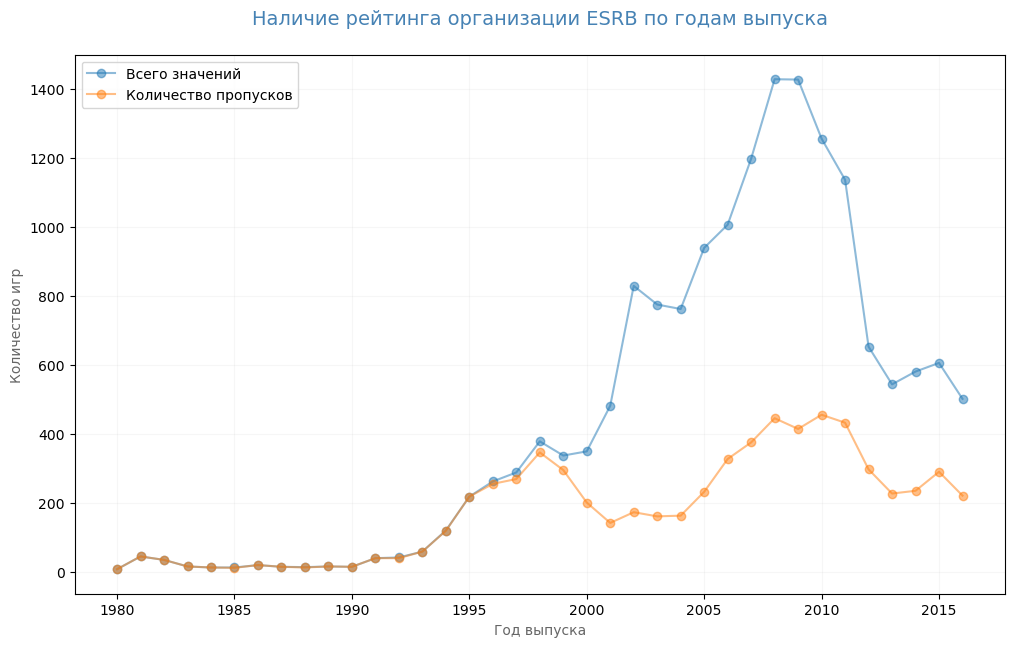

In [706]:
mean_rating, rating_year = get_gaps_column_section(data_games, 'rating.isna()', 'year_of_release')

rating_year.sort_index().plot(y=['cnt_games', 'gaps'],
                              figsize=(12, 7),
                              style='-o',
                              alpha=0.5)

plt.title('Наличие рейтинга организации ESRB по годам выпуска' + '\n', fontsize = 14, color = 'SteelBlue')
plt.xlabel('Год выпуска', alpha=0.6)
plt.ylabel('Количество игр', alpha=0.6)
plt.legend(['Всего значений', 'Количество пропусков'])
plt.grid(alpha=0.1)
plt.show()

In [707]:
# Рассмотрим среднее значение после 1995 года
mean_rating, rating_year = get_gaps_column_section(data_games.query('year_of_release > 1995') , 
                                                   'rating.isna()', 
                                                   'year_of_release'
                                                  )

Среднее значение пропусков по каждому year_of_release 45.94 %


С 1980 по 1995 данных рейтинга нет, т.к. организация ESRB появилась только в 1994 году. Однако с 1995 года рейтинг присвоен примерно половине игр.

**Выводы**:
- *количество пропусков*: 6676 (40,6%) - значимые пропуски
- *причины, по которым могли возникнуть пропуски*: 
  * до 1995: отсутствие организация ESRB, т.к. организация появилась в 1994;
  * ошибка пользователя при заведении;
  * ошибка интеграции (если данные подгружаются с сайта организации);
  * игра не была оценена организацией (по многим строкам с пропусками низкое количество продаж);
  * игра еще находится в стадии доработки и претерпевает изменения (организация оценивает конечный продукт перед официальным выпуском)
- *как исправить*: 
  * обратиться к коллегам, отвечающим за заполнение и выгрузку данных, для устранения недочетов;
  * т.к. пропусков слишком большое количество и данных по возрастным ограничениям в других колонках нет, логичнее всего заполнить значением по умолчанию, например, "unknown", чтобы не потерять пропуски

In [708]:
# Заполнение пропусков
data_games['rating'] = data_games['rating'].fillna('unknown')

In [709]:
# Проверим результаты
data_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Итоги обработки пропусков:**

В ходе анализа пропусков выявлены пропуски в 6 из 11 столбцов:
   - Названия и жанры игр, пропущенные в 2 строках, невозможно восстановить, поэтому из-за малого количества строки удалены. Наиболее вероятной причиной пропусков является человеческий фактор или отсутствие официального названия, т.к. игры 1993 года;
   - Год выпуска игры имеет незначительное количество пропусков. Из-за отсутствия нужных данных в других столбцах было принято решение удалить данные строки. Причиной пропусков может быть некорректное заведение данных пользователем, т.к. в части названий встречается год выпуска игры;
   - Пропуски в оценках экспертов, пользователей и организации ESRB в 95% пересекаются и встречаются почти в половине исследуемой выборки. Т.к. пропусков большое количество, заполнить медианным или средним значением нельзя, поэтому заменены значениями по умолчанию "-1" (оценки) и "unknown" (рейтинг ESRB). Природа пропусков имеет схожие признаки:
        * отсутсвие до 1993 большого количества игр и соответствующих агрегаторов для их оценки; 
        * возможна интеграционная ошибка получения данных с официальных сайтов;
        * неоцененность игр из-за их непривлекательности (по многим строкам с пропусками низкое количество продаж);
        * недавно вышедшие игры и еще не получившие официальную оценку;
   - В столбце с пользовательской оценкой обнаружены неявные пропуски: для неоцененных игр значение заполнено как принято в международном сообществе "tbd", т.е. ожидает оценки. Т.к. для анализа данной колонки нам нужны числовые значения они также заменены на "-1".

### Изменение типов данных

На этапе обзора данных отметили, что для столбцов `year_of_release` и `user_score` задан неверный тип данных. Скорректируем типы данных.

In [710]:
# Скорректируем типы данных
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games['user_score'] = data_games['user_score'].astype(float)

In [711]:
# Проверим полученные типы данных
data_games.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [712]:
# Проверим полученные типы данных
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


Также можно отметить, что оценки экспертов всегда являются целыми числами, т.к. система оценивания Metacritic - это 100-балльная шкала. Приведем их к правильному типу:

In [713]:
# Скорректируем тип данных 
data_games['critic_score'] = data_games['critic_score'].astype(int)

**Итоги обработки типов данных:**

- Для `year_of_release` тип данных приведен к целому числу, т.к. год выпуска игры не может быть вещественным значением;
- Для `user_score` тип данных приведен к вещественному числу, т.к. пользовательский рейтинг выражается в числах и будет необходим для дальнейших математических операций;
- Для `critic_score` тип данных приведен к целому числу, т.к. оценка экспертов, рассчитанная по 100-балльной шкале, выражена в целых числах.

### Обработка дубликатов

В таблице четыре столбца представлены строковыми значениями, поэтому могут иметь дубликаты, например, из-за неправильно введенного регистра. Проверим данные на явные, неполные и неявные дубликаты.

In [714]:
print('Количество явных дубликатов строк таблицы:', data_games.duplicated().sum())

Количество явных дубликатов строк таблицы: 0


In [715]:
# найдем неполные дубликаты
data_games[data_games.duplicated(['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


Поиск неполных дубликатов показал 3 игры, дублирующиеся по наименованию и платформе, где:
- Madden NFL 13 - действительно дубликат, т.к. по данной строке почти нет продаж;
- Need for Speed: Most Wanted - не является дубликатом, т.к. был перезапуск игры в 2012.

In [716]:
# удалим дубликат
data_games = data_games.drop_duplicates(['name', 'platform', 'year_of_release'])

Перейдем к проверке на неявные дубликаты по каждому столбцу со строковыми значениями:

**`name`**

In [717]:
# Рассчитаем количество уникальных значений в столбце
print('Количество уникальных значений в столбце:', data_games['name'].nunique())

Количество уникальных значений в столбце: 11426


In [718]:
# Рассчитаем количество уникальных значений в столбце (без учетом регистра)
print('Количество уникальных значений в столбце:', data_games['name'].str.lower().nunique())

Количество уникальных значений в столбце: 11426


Количество уникальных наименований может отличаться от длины таблицы, т.к. игра чаще всего представлена на нескольких платформах. Количество приведенных к нижнему регистру наименований игр равно количеству уникальных значений, значит неявных дубликатов данного типа нет.
Вручную проверить 11426 значений на ошибки в наименованиях не представляется возможным, поэтому примем, что дубликатов в данной колонке нет.

**`genre`**

In [719]:
# Рассчитаем количество уникальных значений в столбце
print('Количество уникальных значений в столбце:', data_games['genre'].nunique())

Количество уникальных значений в столбце: 12


In [720]:
# Рассмотрим уникальные значения в столбце на предмет дубликатов
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов в столбце с жанром игры не обнаружено.

**`platform`**

In [721]:
# Рассчитаем количество уникальных значений в столбце
print('Количество уникальных значений в столбце:', data_games['platform'].nunique())

Количество уникальных значений в столбце: 31


In [722]:
# Рассмотрим уникальные значения в столбце на предмет дубликатов
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Несмотря на схожесть в некоторых названиях, например, PS, PSP, PS2, PS3 и PS4 - это разные модели, поэтому не являются дубликатами. Дубликатов также нет.

**`rating`**

In [723]:
# Рассчитаем количество уникальных значений в столбце
print('Количество уникальных значений в столбце:', data_games['rating'].nunique())

Количество уникальных значений в столбце: 9


In [724]:
# Рассмотрим уникальные значения в столбце на предмет дубликатов
data_games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Согласно официальной документации обозначение 'K-A' действовало до 1998, после чего название изменилось на 'E'. Переименуем рейтинг к новому виду, т.к. это одна категория "Для всех".

In [725]:
# Переименуем наименование категории
data_games['rating'] = data_games['rating'].replace('K-A', 'E')

In [726]:
# Проверим значения
data_games['rating'].value_counts()

unknown    6676
E          3923
T          2905
M          1536
E10+       1393
EC            8
AO            1
RP            1
Name: rating, dtype: int64

**Итоги обработки дубликатов:**

В ходе анализа явных дубликатов строк не выявлено, однако обнаружен и удален неполный дубликат по ключевым полям "наименование", "платформа", "год выпуска".

Неявные дубликаты обнаружены только в столбце с рейтингом ESRB. Т.к. он связан с тем, что категория поменяла обозначение, произвели замену старого обозначения на новое.

Для столбца с наименованием игр приняли, что дубликатов нет, т.к. количество уникальных значений в обоих регистрах совпадает. Проверить вручную 11426 не представляется возможным.

### Обработка аномальных значений

Исследуем все числовые колонки на предмет выбросов (аномальных значений)

In [727]:
# Рассмотрим описательную статистику по данным
data_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,32.976829,2.687910
std,5.875546,0.818400,0.506731,0.311109,0.188011,36.301955,4.170193
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


**Выводы:**
- `year_of_release` - для анализа предоставлены исторические данные по 2016, поэтому диапазон с 1980 по 2016 - корректен. Выбросов и аномалий нет;
- `na_sales`, `eu_sales`, `jp_sales` и `other_sales` - столбцы о проданных миллионных копиях - имеют большой разброс значений и выбросы, но аномалиями их назвать нельзя, т.к. от года к году спрос на игры растет и данные 1980 разительно отличаются от 2016. Также есть всемирно известные игры и менее популярные, но возможно оценненные своей аудиторией. Поэтому за аномалии данные выбросы принимать не будем, рассмотрим данные значения на этапе исследовательского анализа данных;
- `critic_score` - не имеет выбросов, т.к. оценка критиков представлена в диапазоне от 0 до 100. Значение "-1" было установлено раннее для обозначения пропусков, поэтому аномальным значением не является;
- `year_of_release` - не имеет выбросов, т.к. оценка пользователей представлена в диапазоне от 0 до 10. Значение "-1" было установлено раннее для обозначения пропусков, поэтому аномальным значением не является.

Таким образом, на данном этапе выбросов и аномальных значений в данных не выявлено.

### Добавление новых столбцов

Посчитаем суммарные продажи по всем регионам и запишим их в отдельный столбец:

In [728]:
# Добавим новый столбец
data_games['total_sales'] = data_games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [729]:
# Проверим добавленные значения
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## Исследовательский анализ данных

### Распределение выпущенных игр по годам

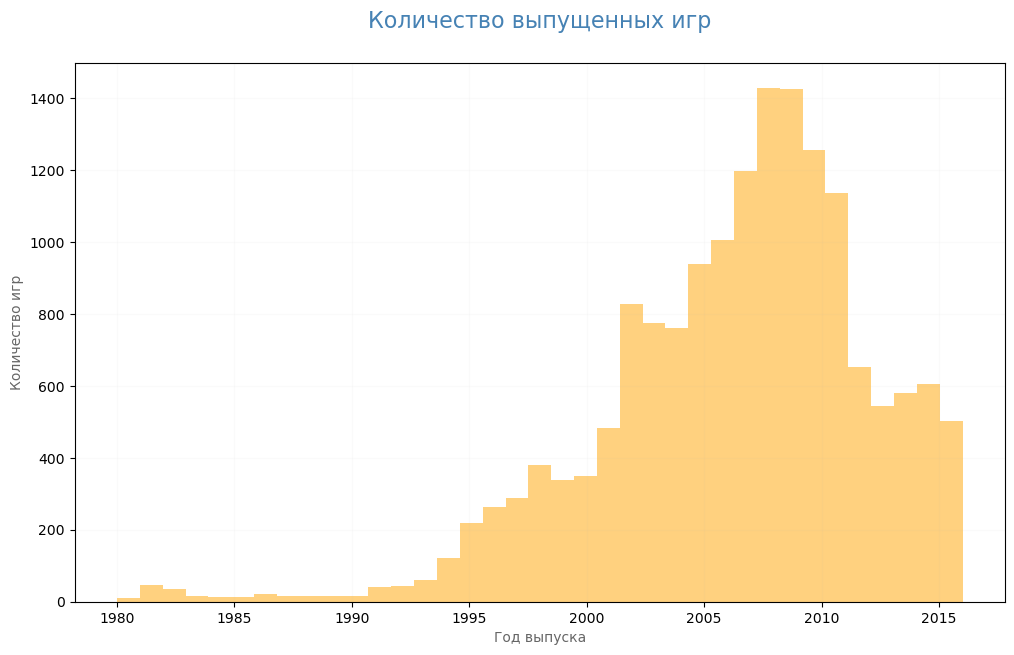

In [730]:
# Построим гистограмму рапсределения игр по годам выпуска
data_games['year_of_release'].plot(kind='hist', 
                                   bins=37,
                                   color='orange',
                                   alpha=0.5, 
                                   figsize=(12, 7)
                                  )
plt.grid(alpha=0.05)
plt.title('Количество выпущенных игр' + '\n', fontsize=16, color='SteelBlue')
plt.xlabel('Год выпуска', alpha=0.6)
plt.ylabel('Количество игр', alpha=0.6)
plt.show()

На гистограмме можно выделить 3 периода:
* с 1980 по 1990 - зарождение игровой индустрии
* с 1991 по 2009 - развитие игровой индустрии и бурный рост 
* с 2010 по 2016 - смена тренда, снижение выпуска игр (однако за 2016 год данные могут быть неполные)

Данные раннего периода (с 1980 по 1990) не интересны для дальнейшего анализа, т.к. неактуальны и не соответствуют нынешним реалиям. 

Примерно половина исследуемой выборки - это игры, выпущенные с 2005 по 2011 год (~ 900-1400 игр в год). За последние годы с 2012 по 2016 выпуск не превышает 652 игр в год (в 2 раза меньше пикового значения).

### Распределение продаж по платформам

In [731]:
# Создадим сводную таблицу с данными по продажам в разрезе годов и платформ
games_years_platform = data_games.pivot_table(index='year_of_release', 
                                              columns='platform', 
                                              values='total_sales', 
                                              aggfunc='sum')

In [732]:
# Рассмотрим, как менялись продажи по платформам
fig = px.line(games_years_platform,
              markers=True
             )

fig.update_layout(title='Распределение продаж по платформам и годам',
                  xaxis_title='Год выпуска',
                  yaxis_title='Суммарные продажи, млн копий',
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)'
                 )

fig.show()

Согласно графику наиболее прибыльными за весь период можно считать платформы, которые хотя бы в одном году имели продажи более 100 млн копий: 'PS', 'PS3', 'PS2', 'Wii', 'X360', 'PS4'. Сразу можно сделать вывод, что линейка PS всегда находится в топе, однако пик актуальности приходится на 'PS2' и с появлением конкурентов продажи стали снижаться.

Рассчитаем средний жизненный цикл платформы. Для этого уберем аномальные значения:
- "DS" (выброс 1985 года, хотя платформа вышла в 2004 году)
- "PC" (слишком долго на рынке и не игровая приставка)
- новые платформы: "PS4", "XOne", "PSV", "3DS", "WiiU" (срок продаж не завершен)

После чего разделим платформы на малые и крупные по количеству проданных копий.

In [733]:
# Рассмотрим выбросы 1985 года
data_games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


Официальной информации по данной игре не найдено. Т.к. год выпуска игры меньше года выпуска платформы, то удалим данную строку, как выброс.

In [734]:
# Удалим выброс
data_games = data_games.query('platform != "DS" or (platform == "DS" & year_of_release != 1985)')
games_years_platform.loc[games_years_platform.index == 1985, 'DS'] = np.NaN

In [735]:
# Отберем платформы без аномалий
platforms_not_anomalies = (data_games
                           .query('platform not in ["PC", "PS4", "XOne", "PSV", "3DS", "WiiU"]')['platform']
                           .unique()
                          )

# Выделим крупные платформы
large_platforms = ['PS', 'PS3', 'PS2', 'Wii', 'X360', 'DS']

# Выделим малых платформы
small_platforms = []

for p in platforms_not_anomalies:
    if p not in large_platforms:
        small_platforms.append(p)

In [736]:
# Рассчитаем жизненный цикл каждой платформы
life_cycle_platforms = games_years_platform.count().reset_index()
life_cycle_platforms.columns = ['platform', 'number_of_years']

In [737]:
# Рассчитаем средний жизненный цикл для крупных платформ
life_cycle_platforms.query('platform in @large_platforms')['number_of_years'].mean()

11.0

In [738]:
# Рассчитаем средний жизненный цикл для малых платформ
life_cycle_platforms.query('platform in @small_platforms')['number_of_years'].mean()

6.315789473684211

Платформы, на которых выпускаются игры, имеют свой жизненный цикл: появление - развитие - стагнация - падение. У каждой платформы свой жизненный цикл, но в среднем он длится ~6 лет для малых платформ и ~11 лет для крупных платформ - по мере снижения пользовательского интереса производитель выпускает более актуальную и производительную версию платформы.

Например, серия PlayStation появилась в 1994 и была самой популярной до 2000 года. С 2000 года вышла новая версия - PS2, продажи которой превышают данные за весь период. В 2006 вышла PS3, которую в 2013 сменила PS4. Также в 2004 и 2011 появились портативные системы PSP и PSV. Т.е. характерный срок появления новых платформ примерно составляет 5 лет, а жизненный цикл 11 лет (без учета платформ, у которых срок продаж не завершен).

Платформы Nintendo появлялись чаще, постепенно набирая популярность. С 1999 по 2006 практически каждый год выходил новый продукт.

В целом, можно отметить, что часто новые платформы разных производителей выходят примерно в один период. Так можно выделить 1990, 1994, 2000, 2004-2006, 2012-2013 года.

Таким образом, в среднем характерный срок для появления новых платформ примерно - 5 лет. Срок исчезновения у каждой платформы примерно одинаковый - 5-7 лет (у менее популярных от 3), т.к. все медленно выходят из обихода и сменяются новой версией.

Исключением является РС, т.к. это не игровая консоль или приставка. Игры для персонального компьютера стали пользоватеься спросом с 1994 и актуальны по сегодняшний день.

*Рассмотрим суммарные продажи за все года в разрезе платформ и регионов:*

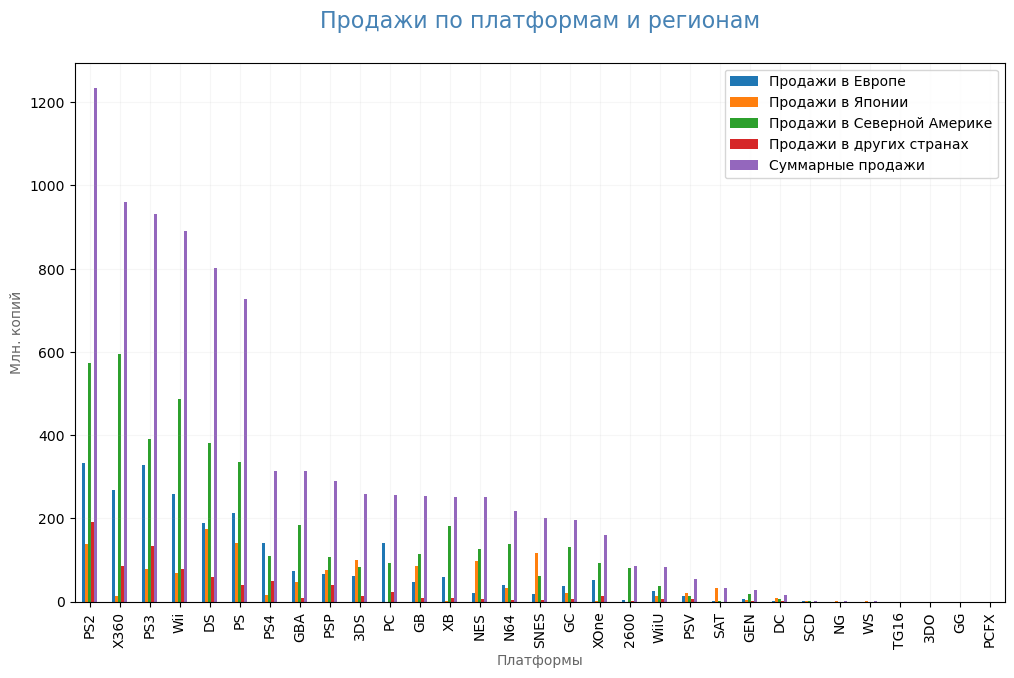

In [739]:
# Создадим сводную таблицу по платформам и регионам
(data_games
 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot.bar(figsize=(12, 7),
            grid=True)
);

plt.grid(alpha=0.1)
plt.title('Продажи по платформам и регионам' + '\n', fontsize=16, color='SteelBlue')
plt.ylabel('Млн. копий', alpha=0.6)
plt.xlabel('Платформы', alpha=0.6)
plt.legend(['Продажи в Европе', 'Продажи в Японии', 'Продажи в Северной Америке', 'Продажи в других странах', 'Суммарные продажи'])
plt.show()

По суммарным продажам можно разделить платформы на 4 категории:
* до 2 млн копий - непопулярные платформы;
* от 15 до 90 млн копий - популряные портативные системы;
* от 150 до 350 млн копий - популярные платформы, в большиснтве своем вышедшие недавно и еще не ушедшие с рынка;
* от 700 млн копий - наиболее популярные платформы за все времена.

Также заметна разница по продажам в разных странах: некоторые платформы популярны больше всего США или Европе, другие в Японии.

### Выделение актуального периода для анализа

Для дальнейшего прогноза на 2017 год необходимо выбрать период с актуальными данными. Т.к. игровая индустрия динамично развивается, то не стоит брать слишком большой временной интервал - иначе можно захватить уже отжившие тренды.

Т.к. данные за 2016 год могут быть неполными, то для анализа выделим период 2014-2016 с более релевантными данными.

In [740]:
# Оставим только актуальные данные
data_games = data_games.query('year_of_release >= 2014')

In [741]:
# Проверим полученную выборку
data_games.shape

(1689, 12)

1689 строк - достаточная выборка для исследовательского анализа данных и работы с гипотезами

### Выделение лидеров по продажам

С учетом нового периода рассмотрим подробнее какие платформы лидируют по продажам

In [742]:
# Выделим актуальные данные
games_years_platform = games_years_platform.query('index >= 2014').dropna(axis=1, how='all')

In [743]:
# Рассмотрим, как менялись продажи по платформам c 2014 года
fig = px.line(games_years_platform, 
              title='Распределение продаж по платформам и годам, млн копий',
              markers=True,
              color_discrete_sequence=px.colors.sequential.Viridis
             )

fig.update_layout(xaxis_title='Год выпуска',
                  yaxis_title='Суммарные продажи, млн копий',
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)',
                  xaxis = dict(dtick=1)
                 )

fig.show()

Абсолютным лидером по продажам с 2014 по 2016 год является стационарная консоль PlayStation 4, количеством проданных копий на которой превышает продажи игровой приставки Xbox One в 2 раза. Также выделется платформа компании Nintendo 3DS, занимающая 3 место про продажам. Именно по этим платформам вероятнее всего будет прорыв в 2017 году.

Также всегда пользуются спросом игры на персональном компьютере. Данная платформа имеет самый долгий жизненный цикл, т.к. остается самой дешевой. Однако по количеству продаж значительно отстает от консолей.

Остальные платформы демонстрируют падение и к 2016 году их продажи стремятся к нулю:
* PS3 - платформа серии PlayStation, является предыдущей версией PS4. По мере перехода пользователей на новую версию продажи логично снижаются;
* X360 - наиболее популярная приставка компании Microsoft, которая последовала за Xbox, является предыдущей версией для Xbox One. Количество проданных копий в период с 2008 по 2011 были максимальными. По мере перехода пользователей на новую версию продажи снижаются;
* WiiU - платформа компании Nintendo, вышедшая на замену 3DS в 2012 году. Как видно на графике, платформа не приобрела популярность;
* PSV - портативная консоль серии PlayStation, вышедшая на замену PSP в 2012 году. Портативная консоль на данный момент пользуется малой популярностью, т.к. данную функцию у большинства пользователей могут заменить смартфоны;
* Wii - платформа компании Nintendo популярная с 2006 по 2009 год;
* PSP - первая портативная консоль серии PlayStation, не получившая популярность по сравнению со стационарными консолями.

*Рассмотрим более подробно данные по лидерам продаж*

In [744]:
# Выделим данные по лидерам продаж
data_liders = data_games.query('platform in ["XOne", "PS4", "3DS", "PC"]')

# Построим диаграммы размаха по глобальным продажам игр в разбивке по популярным платформам
fig = px.box(data_liders, 
             x='platform', 
             y='total_sales', 
             title='Диаграмма размаха', 
             color = 'platform',
            )

fig.update_layout(xaxis_title='Платформы',
                  yaxis_title='Суммарные продажи, млн копий',
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)'
                 )

fig.show()

Диаграммы размаха по двум наиболее популярным плтаформам демонстрируют примерно одинаковую описательную статистику: квартили, медиану (0.18 и 0.2) и предельные значения (1.54 и 1.49), т.е. в среднем продажи на платформах одинаковые. 

3DS и PC демонстрируют показатели ниже: 
   - медиана 0.09 и 0.06 (в 2-3 раза ниже);
   - верхняя граница в 0.57 и 0.47 (в 3 раза ниже). 

Вероятно это связанно с тем, что данная платформа 3DS популярна именно в конкретном регионе (данное предположение рассмотрим ниже при составлении портрета пользователя), а PC - всегда отстается на стабильном уровне.

Также можно отметить большое количество выбросов по каждой платформе. Они демонстрируют, на какой платформе больше наиболее продаваемых игр. Именно поэтому у PS4 рекордные продажи.

Рассмотрим продажи на других платформах.

In [745]:
# Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам
fig = px.box(data_games, x='platform', y='total_sales', title='Диаграмма размаха', color='platform')

fig.update_layout(xaxis_title='Платформы',
                  yaxis_title='Суммарные продажи, млн копий',
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)'
                 )

fig.show()

In [746]:
# Получим описательную статистику по продажам на всех платформах
data_games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [747]:
# Рассчитаем средние показатели по всем платформам
data_games.groupby('platform')['total_sales'].describe().mean()

count    168.900000
mean       0.386902
std        0.739748
min        0.010000
25%        0.038250
50%        0.126000
75%        0.403750
max        5.745000
dtype: float64

Таким образом, средние значения по всем платформам соответствуют средним показателям по лидерам продаж. Также, если вернуться к графику 'Распределение продаж по платформам и годам, млн копий' можно отметить, что в среднем по всем платформам одинаковые продажи (исключение составляют портативные консоли). Разницу создают именно бестселлеры игровой индустрии (аномальные значения), т.к. такие игры часто выпускаются только на самых популярных платформах.

### Влияние оценок пользователей и критиков на продажи

Рассмотрим влияние оценок пользователей и критиков на продажи на примере наиболее популярных платформ

In [748]:
# Выделим данные по PS4
data_ps4 = data_games.query('platform == "PS4"')

# Выделим данные по XOne
data_xone = data_games.query('platform == "XOne"')

# Выделим данные по 3DS
data_3ds = data_games.query('platform == "XOne"')

# Выделим данные по PC
data_pc = data_games.query('platform == "PC"')

In [749]:
# Создадим вспомогательную функцию расчета корреляции
def get_corr(data, 
             platform,
             x=['critic_score', 'user_score'], 
             y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
            ):
    corr = data.corr().loc[x, y]
    print('Корреляция для', platform), display(corr)

In [750]:
# Рассчитаем коэффициенты корреляцию между оценками и продажами
get_corr(data_ps4, 'PS4')
get_corr(data_xone, 'XOne')
get_corr(data_3ds, 'XOne')
get_corr(data_pc, 'PC')

Корреляция для PS4


,na_sales,eu_sales,jp_sales,other_sales,total_sales
critic_score,0.198972,0.207569,0.001022,0.214753,0.210847
user_score,0.101671,0.103792,-0.052757,0.108071,0.104115


Корреляция для XOne


,na_sales,eu_sales,jp_sales,other_sales,total_sales
critic_score,0.256459,0.255965,0.143906,0.266569,0.271476
user_score,0.101112,0.100063,0.086617,0.103265,0.106714


Корреляция для XOne


,na_sales,eu_sales,jp_sales,other_sales,total_sales
critic_score,0.256459,0.255965,0.143906,0.266569,0.271476
user_score,0.101112,0.100063,0.086617,0.103265,0.106714


Корреляция для PC


,na_sales,eu_sales,jp_sales,other_sales,total_sales
critic_score,0.227914,0.146334,NaN,0.201572,0.183923
user_score,0.106242,0.042855,NaN,0.081967,0.069015


Связь между количеством продаж и оценками экспертов:
- PS4: коэффициент Пирсона демонстрирует очень слабую положительную линейную связь (исключение составляют продажи по Японии, в данном случае связь отсутствует);
- XOne: коэффициент Пирсона демонстрирует очень слабую положительную линейную связь (в среднем на 0.06 выше, чем по PS4);
- 3DS: коэффициент Пирсона демонстрирует отсутствие линейной связи;
- PC: коэффициент Пирсона демонстрирует очень слабую положительную линейную связь (исключение составляют продажи по Японии, т.к. данных по ним нет).

Связь между количеством продаж и оценками пользователей:
- PS4: коэффициент Пирсона демонстрирует очень слабую положительную линейную связь - в 2 раза меньше, чем корреляция с оценками экспертов (исключение составляют продажи по Японии, в данном случае связь очень слабая отрицательная);
- XOne: коэффициент Пирсона демонстрирует очень слабую положительную линейную связь - почти в 3 раза меньше, чем корреляция с оценками экспертов;
- 3DS: коэффициент Пирсона демонстрирует отсутствие линейной связи;
- PC: коэффициент Пирсона демонстрирует отсутствие линейной связи (исключение составляют продажи по Японии, т.к. данных по ним нет, и продажи по США - связь очень слабая положиельная).

В целом можно сказать об отсутствии линейной связи между оценками экспертов/пользователей и продажами, т.к. корреляции представлена в диапазоне от -5% до +27%.

Рассмотрим взаимосвязи подробнее, возможно есть нелинейная зависимость:

In [751]:
# Создадим вспомогательную функцию для создания диаграммы зависимости
def scatter_plot(data, title, ax, x='critic_score', y='total_sales', color='orange', xlabel='Оценки критиков'):
    data.plot(x=x, 
              y=y, 
              kind='scatter', 
              color=color,
              alpha=0.5,
              ax=ax)
    ax.grid(alpha=0.05)
    ax.set_title(title, fontsize=16, color='SteelBlue')
    ax.set_xlabel(xlabel, alpha=0.6)
    ax.set_ylabel('Количество продаж', alpha=0.6)

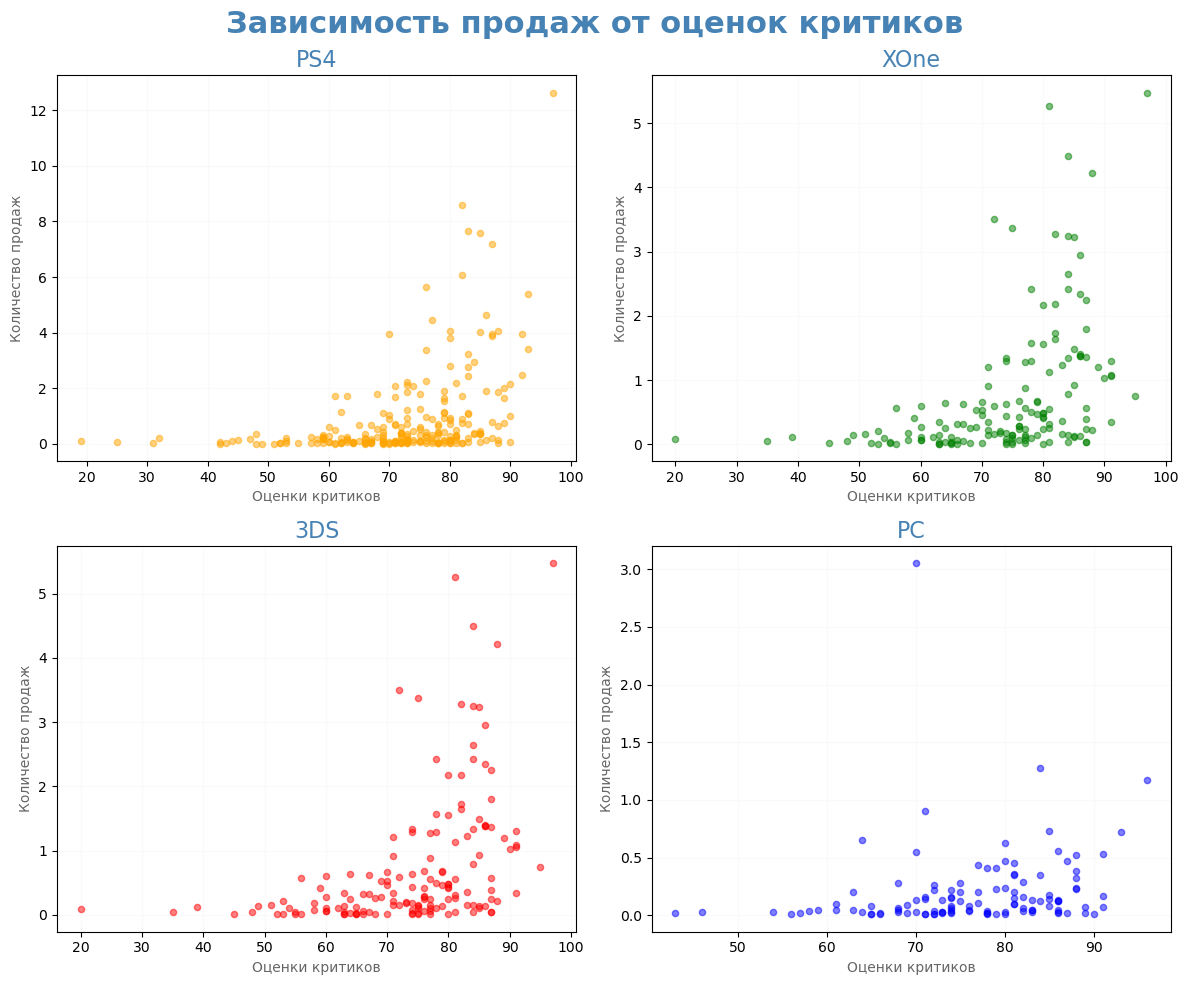

In [752]:
# Рассмотрим взаимосвязь между продажами и оценками критиков
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

scatter_plot(data=data_ps4.query('critic_score != -1'), 
             title='PS4',
             ax=ax[0, 0])
scatter_plot(data=data_xone.query('critic_score != -1'), 
             title='XOne',
             color='green',
             ax=ax[0, 1])
scatter_plot(data=data_3ds.query('critic_score != -1'), 
             title='3DS',
             color='red',
             ax=ax[1, 0])
scatter_plot(data=data_pc.query('critic_score != -1'), 
             title='PC',
             color='blue',
             ax=ax[1, 1])

fig.suptitle('Зависимость продаж от оценок критиков', 
             fontsize = 22, 
             color='SteelBlue',
             fontweight='bold')
fig.tight_layout();

Диаграммы рассеяния по всем платформам подтверждают слабую силу связи между оценками критиков и количеством проданных тиражей, т.к. с ростом оценки количество продаж увеличиается в единичных случаях (вероятно популярные игры). По данным PS4 в диапазоне от 60 до 85 видно, что основная масса при любой оценке до 1 млн, для других платформ связь прослеживается более явно.

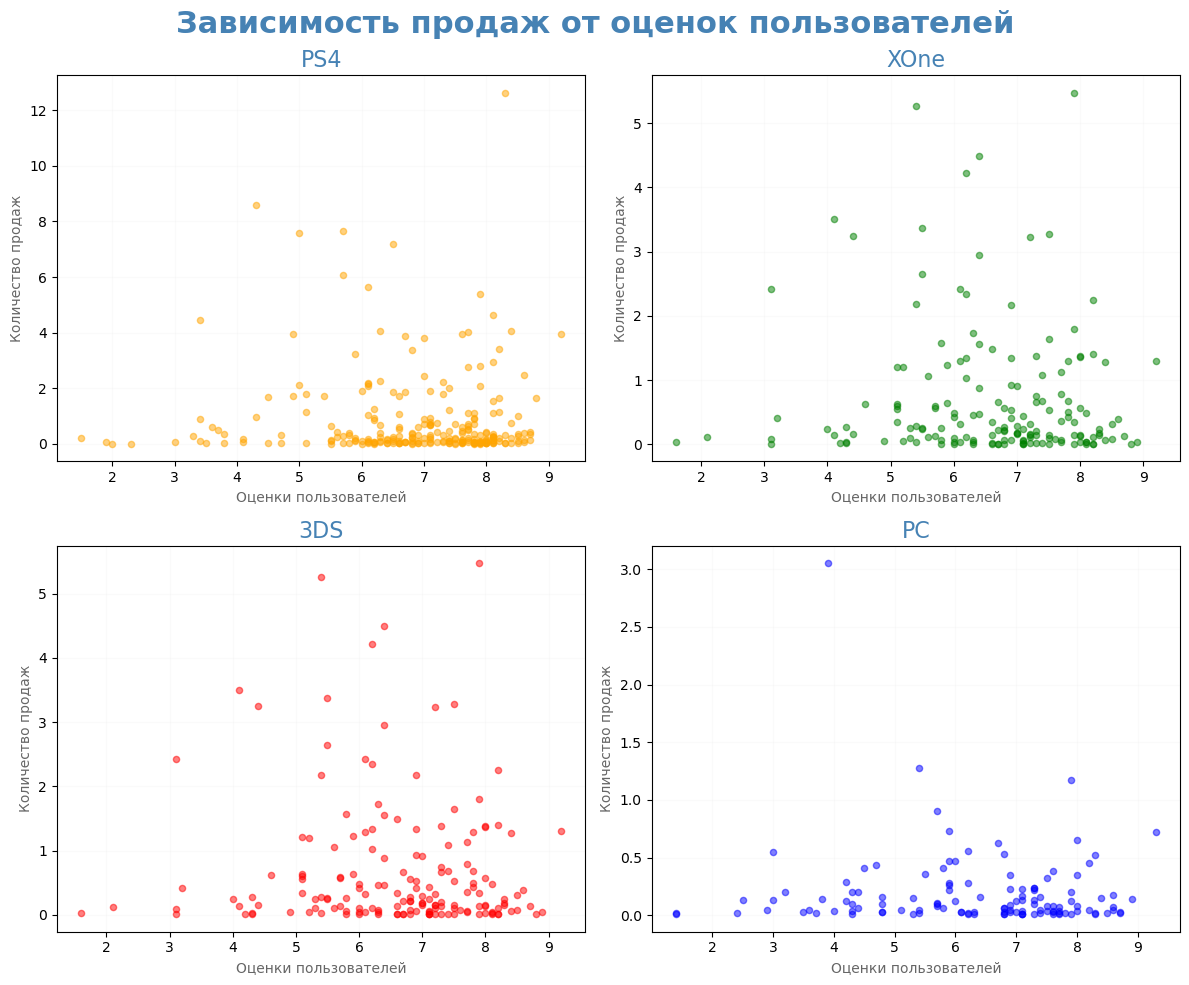

In [753]:
# Рассмотрим взаимосвязь между продажами и оценками пользователей
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

scatter_plot(data=data_ps4.query('user_score != -1'),
             x='user_score',
             title='PS4',
             xlabel='Оценки пользователей',
             ax=ax[0, 0])
scatter_plot(data=data_xone.query('user_score != -1'), 
             x='user_score',
             title='XOne',
             color='green',
             xlabel='Оценки пользователей',
             ax=ax[0, 1])
scatter_plot(data=data_3ds.query('user_score != -1'), 
             x='user_score',
             title='3DS',
             color='red',
             xlabel='Оценки пользователей',
             ax=ax[1, 0])
scatter_plot(data=data_pc.query('user_score != -1'),
             x='user_score',
             title='PC',
             color='blue',
             xlabel='Оценки пользователей',
             ax=ax[1, 1])

fig.suptitle('Зависимость продаж от оценок пользователей', 
             fontsize = 22, 
             color='SteelBlue',
             fontweight='bold')
fig.tight_layout();

Диаграммы рассеяния подтверждают отсутствие связи между оценками пользователей и количеством проданных тиражей, т.к. с ростом оценки количество продаж увеличиается в единичных случаях (вероятно популярные игры). В диапазоне от 5.5 до 8.8 видно, что основная масса при любой оценке до 1 млн (до 0.5 в случае 3DS и PС). 

Также по PS4 и ХOne при низкой оценке (от 3.5 до 5) есть рекордное количество продаж, вероятно игра хорошо оценена экспертами или были высокие ожидания, что вызвало всплеск продаж, но после прохождения пользователи поставили неудовлетворительную оценку.

### Распределение игр по жанрам

In [754]:
# Создадим сводную таблицу по жанрам игр
data_genre = data_games.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'count'))
data_genre.sort_values(by='sum', ascending=False)

,count,sum
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


In [755]:
# Рассмотрим распределение количества игр по жанрам
fig = px.pie(data_genre, 
             values ='count', 
             names = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
                      'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], 
             color_discrete_sequence=px.colors.sequential.RdBu,
             title ='Количество выпущенных игр по жанрам',
            )
fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='white', width=.3))
                 )

fig.update_layout(paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

fig.show()

*Топ-5 жанров выпущенных игр:*
1. `Action` преобладает в данных - более 1000 игр (35.7%)
2. `Role-Playing` - 370 игр (12.8%)
3. `Adventure` - 302 (10.5%)
4. `Sports` - 268 (9.29%)
5. `Shooter` - 235 (8.14%)

In [756]:
# Рассмотрим распределение продаж по жанрам
fig = px.pie(data_genre, 
             values ='sum', 
             names = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 
                      'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], 
             color_discrete_sequence=px.colors.sequential.RdBu,
             title ='Продажи игр по жанрам'
            )
fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='white', width=.3))
                 )
fig.update_layout(paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

fig.show()

In [757]:
# Построим диаграммы размаха по глобальным продажам игр в разбивке по жанрам
fig = px.box(data_games, 
             x='genre', 
             y='total_sales', 
             color='genre')

fig.update_layout(title='Диаграммы размаха по глобальным продажам игр в разбивке по жанрам', 
                  xaxis_title='Игровые жанры',
                  yaxis_title='Суммарные продажи, млн копий',
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

fig.show()

*Самые прибыльные жанры (по количеству продаж):*
1. `Action` преобладает в данных - 441 млн (30.5%)
2. `Shooter` - 305 млн (21.1%)
3. `Role-Playing` - 193 млн (13.3%)
4. `Sports` - 181 млн (12.5%)

Однако диаграмма размаха демонстрирует, что`Shooter` - самый стабильный жанр и имеет более длинный ряд успешных игр. Медианное значение по данному жанру - 0.5 млн копий, а третий квартиль включает в себя игры вплоть до 1.6 млн копий. 

Спортивные игры (`Sports`) по данному показателю на втором месте, т.к. медианное значение равняется 0.18 млн копий, а третий квартиль включает в себя игры вплоть до 0.66 млн копий. 

Для сравнения медианное значение по жанру `Action` - 0.09 млн копий, а третий квартиль включает в себя игры всего до 0.28 млн копий. Т.е. прибыльной становится только каждая четвертая игра.

Поэтому самым перспективным вложением будет игра из жанра `Shooter`.

## Портрет пользователя каждого региона

Составим по имеющимся данным портрет пользователя каждого региона:
- NA - Северная Америка
- EU - Европа
- JP - Япония

In [758]:
# Создадим вспомогательную функцию для рассмотрения портрета пользователя в разрезе различных признаков
def plot_sales_dims(df, x_year, dimensions, region, name, ax, other_category=True):
    
    df_year = df.query('year_of_release >= @x_year')
    
    sales = (
        df_year.pivot_table(index=dimensions, values=region, aggfunc='sum')
        .nlargest(5, region)
        .reset_index()
    )
    sales.columns = [dimensions, 'sales']
    
    if other_category:
        other_category = pd.DataFrame([['Other', df_year[region].sum() - sales['sales'].sum()]], columns=[dimensions, 'sales'])
        sales = pd.concat([sales, other_category], ignore_index=True)
        colours = {'Other':'tan'}
    else:
        colours = {}
    
    labels = sales[dimensions]
    key = df[dimensions].unique()
    for i in range(len(key)):
        colours[key[i]] = plt.cm.Set3.colors[i]
    
    sales.plot(y='sales',
               kind='pie',
               legend=False,
               labels=labels,
               autopct='%.1f%%',
               ax=ax,
               title=f'Популярность в {name}',
               ylabel='',
               colors=[colours[key] for key in labels]
              )
    
    plt.tight_layout()

**1 признак: платформы, которые пользуются популярностью**

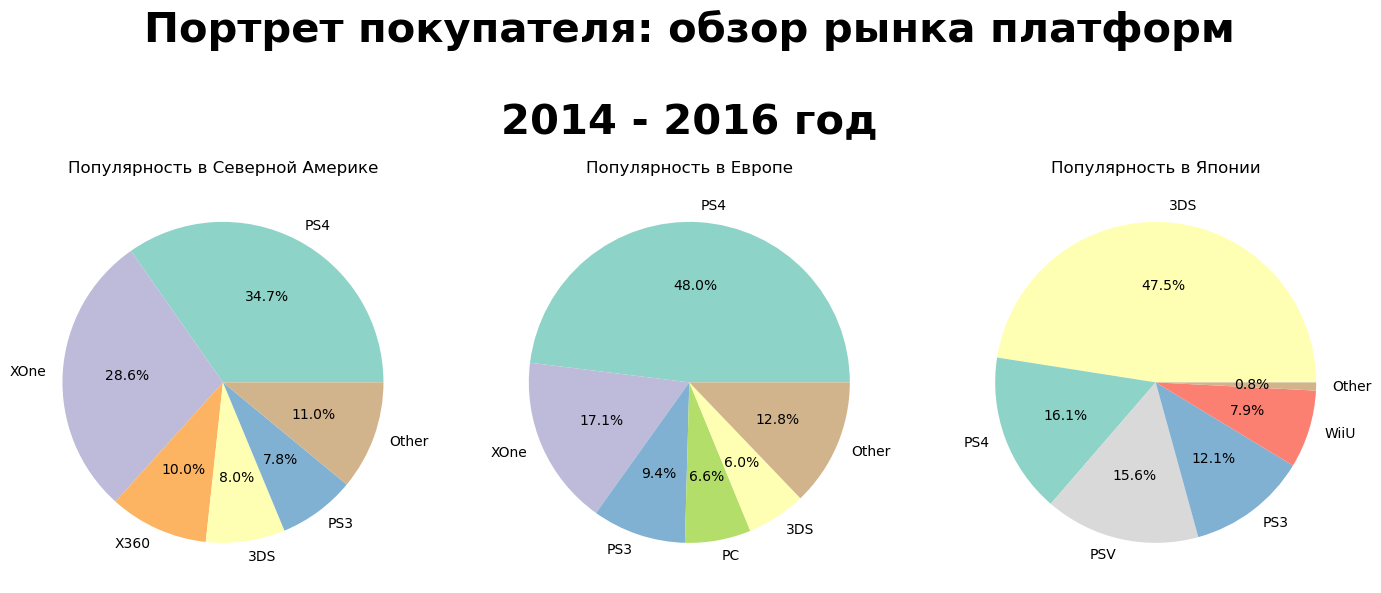

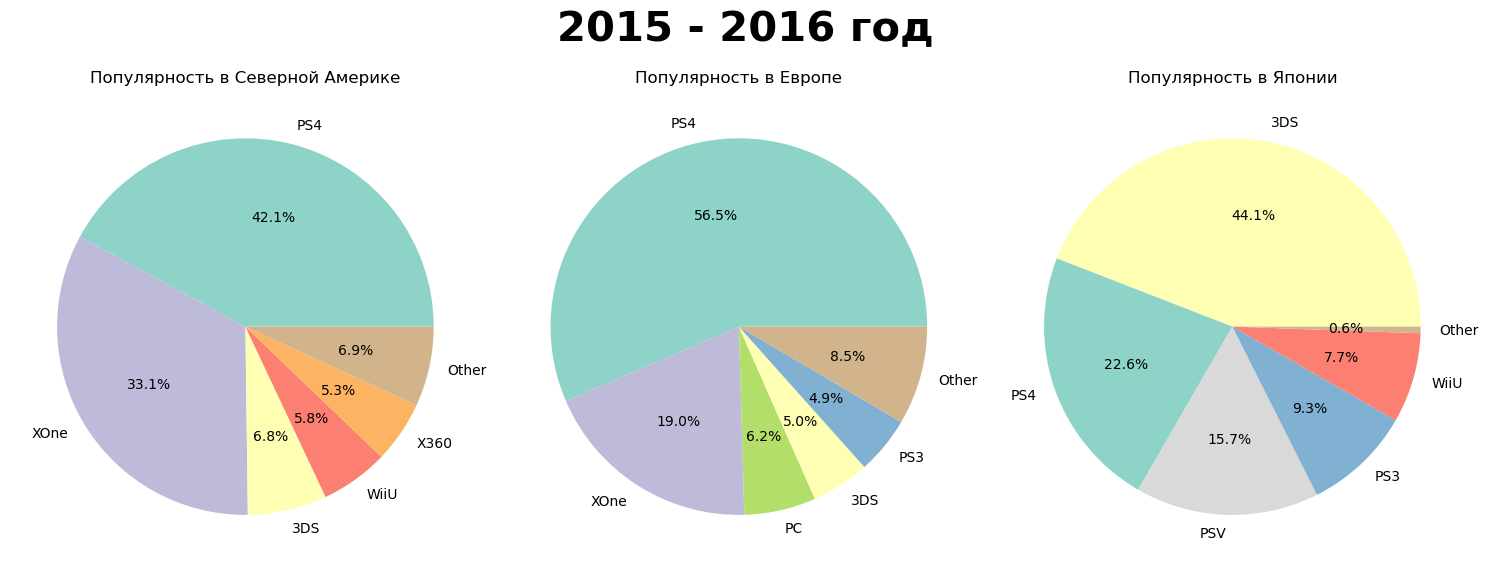

In [759]:
# визуализируем популряность платформ в разных регионах
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('Портрет покупателя: обзор рынка платформ' + '\n' + '\n' + '2014 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2014

plot_sales_dims(data_games, x_year, 'platform', 'na_sales', 'Северной Америке', ax=ax[0])
plot_sales_dims(data_games, x_year, 'platform', 'eu_sales', 'Европе', ax=ax[1])
plot_sales_dims(data_games, x_year, 'platform', 'jp_sales', 'Японии', ax=ax[2])

fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('2015 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2015

plot_sales_dims(data_games, x_year, 'platform', 'na_sales', 'Северной Америке', ax=ax[0])
plot_sales_dims(data_games, x_year, 'platform', 'eu_sales', 'Европе', ax=ax[1])
plot_sales_dims(data_games, x_year, 'platform', 'jp_sales', 'Японии', ax=ax[2])

Самые популярные платформы в Северной Америке в период с 2014 по 2016 год:
1. PS4 - 99 млн (34.7%)
2. XOne - 81 млн (на 20% меньше)

Самые популярные платформы в Европе в период с 2014 по 2016 год:
1. PS4 - 130 млн (48% - почти половина рынка)
2. XOne - 46 млн (на 65% меньше лидера)

Самые популярные платформы в Японии в период с 2014 по 2016 год:
1. 3DS - 44 млн (47.5% - почти половина рынка)
2. PS4 - 15 млн (на 66% меньше лидера)
3. PSV - 14.5 млн
4. PS3 - 11 млн

Таким образом, в Америке и Европе самые популярные платформы в целом совпадают, несомненными лидером является PS4. Однако в Америке также популярен XOne, а в Европе его продажи на 65% меньше.

В Японии на рынке преобладает продукт местной компании - 3DS, продукты серии PS продаются на 66-80% хуже, а продукты Xbox почти не используются. Компания Nintendo лидирует в Японии с 2005 года вероятно из-за региональных особенностей.

Изменения за год доказывают доказывают, что игровой рынок очень быстрый и переменчиый (исключительно за 2016 данные смотреть нецелесообразно, т.к. они могут быть не за полный год):
- в Северной Америке и Еврове в 2015 году большее количество пользователи окончательно перешли на PS4 и XOne с их предыдущих версий, а также сохраняется пропорция в 20% и 65% превосходстве первой соответственно;
- в Северной Америке и Еврове PS4 и XOne делят 75% рынка;
- в Японии в 2015 большую популярность приобрела платформа PS4, одна все равно 3DS владеет почти половиной рынка;
- Япония - единственный из рассматриваемых регионов, где в тройку популярных платформ входит портативная консоль.

**2 признак: жанры, которые пользуются популярностью**

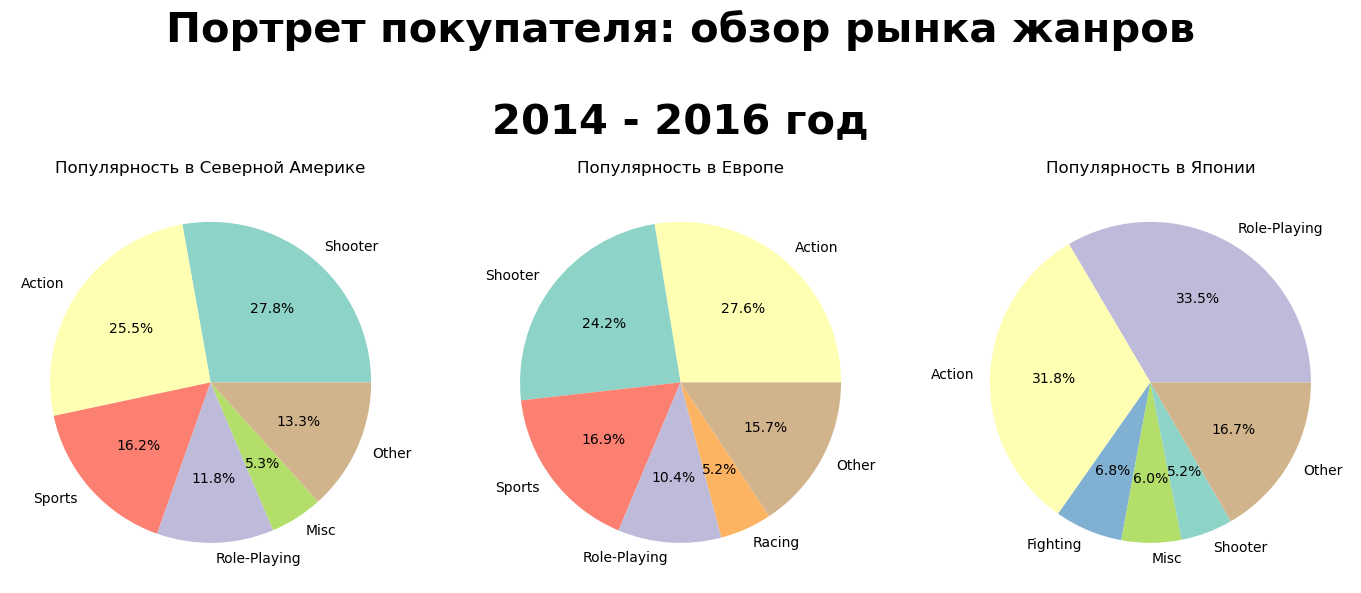

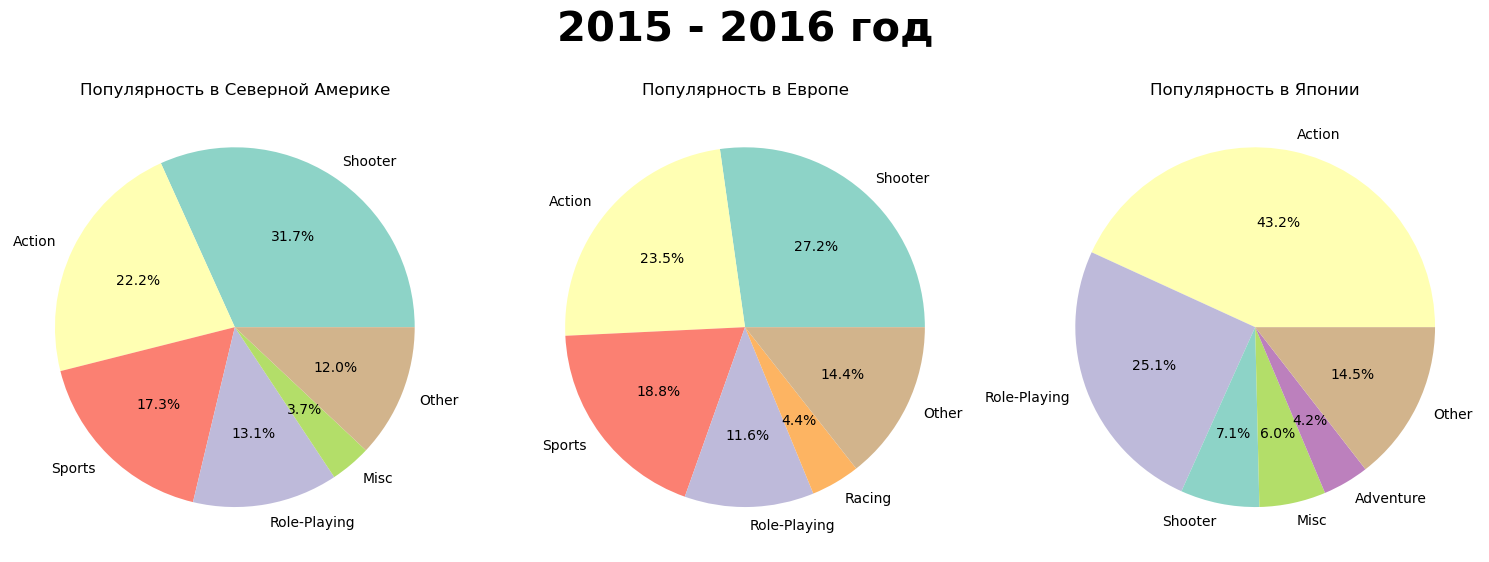

In [760]:
# визуализируем популряность жанров в разных регионах
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('Портрет покупателя: обзор рынка жанров' + '\n' + '\n' + '2014 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2014

plot_sales_dims(data_games, x_year, 'genre', 'na_sales', 'Северной Америке', ax=ax[0])
plot_sales_dims(data_games, x_year, 'genre', 'eu_sales', 'Европе', ax=ax[1])
plot_sales_dims(data_games, x_year, 'genre', 'jp_sales', 'Японии', ax=ax[2])

fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('2015 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2015

plot_sales_dims(data_games, x_year, 'genre', 'na_sales', 'Северной Америке', ax=ax[0])
plot_sales_dims(data_games, x_year, 'genre', 'eu_sales', 'Европе', ax=ax[1])
plot_sales_dims(data_games, x_year, 'genre', 'jp_sales', 'Японии', ax=ax[2])

Самые популярные жанры в Северной Америке с 2014 по 2016 год:
1. Shooter - 79 млн (27.8% рынка)
2. Action - 72.5 млн
3. Sports - 46 млн (на 42% меньше лидера)

Самые популярные жанры в Европе с 2014 по 2016 год:
1. Action - 75 млн (27.6% рынка)
2. Shooter - 65.5 млн
3. Sports - 46 млн (на 39% меньше лидера)

Самые популярные жанры в Японии в период с 2012 по 2016 год:
1. Role-Playing - 31 млн (33.5% рынка)
2. Action - 30 млн (31.8% рынка)

Таким образом, в Северной Америке и Европе, как и платформы, самые популярные жанры совпадают: наиболее привлекательными являются "экшн"-игры, "шутеры" и спортивные игры.

В Японии "экшн" занимает второе место, а самыми популярными являются ролевые игры. Остальные жанры не превышают 6 млн продаж.

Изменения за год наиболее ярко проявились в Европе и Японии:
- в Европе на 1 место по популярности вышли "шутеры", "экшн"-игры перешли на 2 место;
- в Северной Америке и Европе большую популярность стали набирать спортивные игры (+1 и +2 п.п. соответственно)
- в Японии на 1 место по популярности вышли "экшн"-игры (+10 п.п.), ролевые игры перешли на 2 место (- 8 п.п.).

**3 признак для сравнения: влияние рейтинга ESRB на продажи в отдельном регионе**

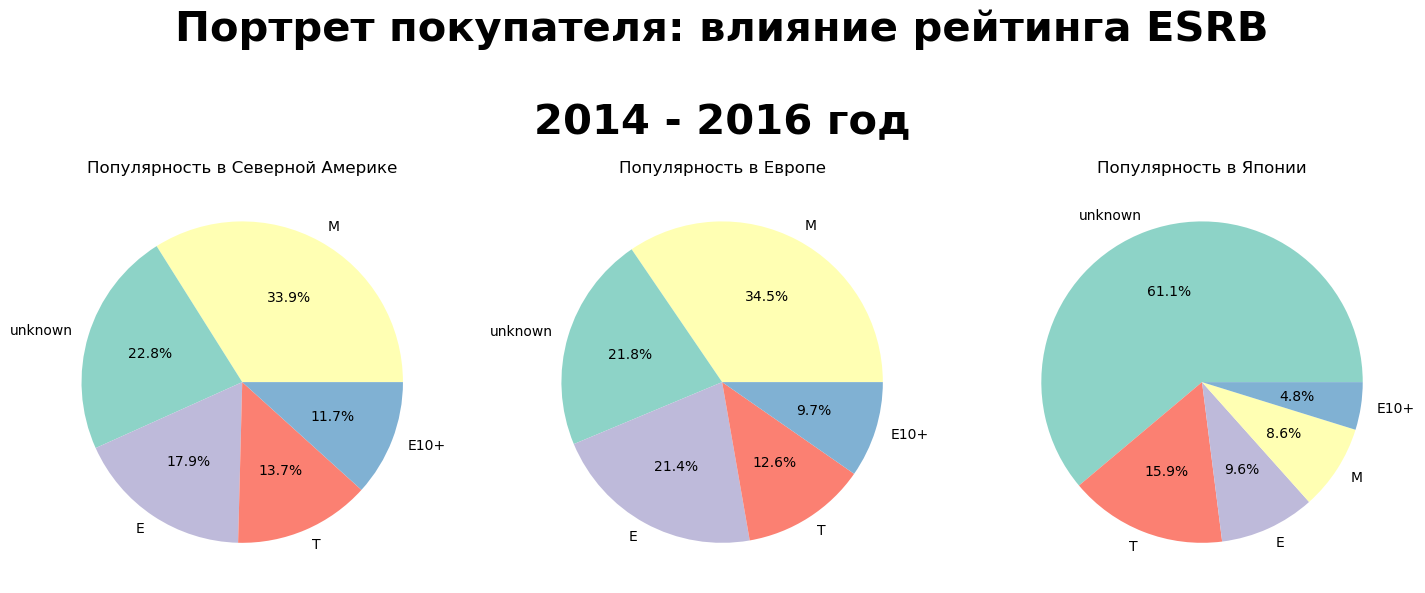

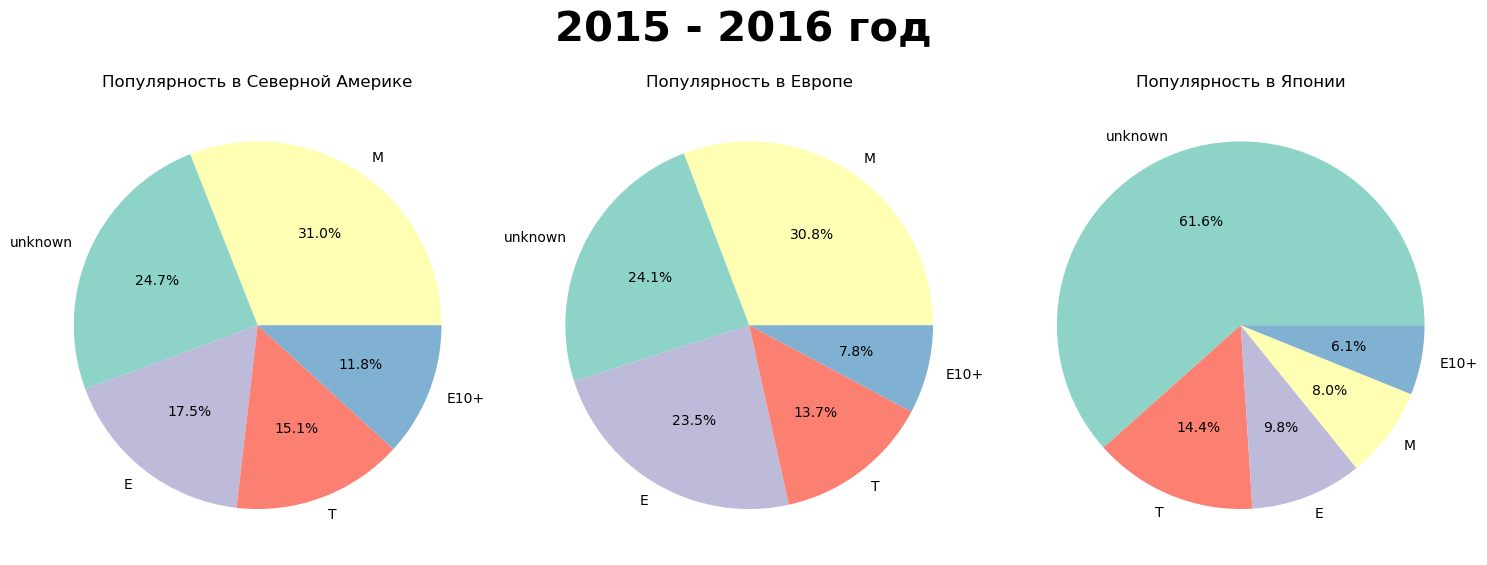

In [761]:
# визуализируем влияние рейтинга ESRB в разных регионах
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('Портрет покупателя: влияние рейтинга ESRB' + '\n' + '\n' + '2014 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2014

plot_sales_dims(data_games, x_year, 'rating', 'na_sales', 'Северной Америке', ax=ax[0], other_category=False)
plot_sales_dims(data_games, x_year, 'rating', 'eu_sales', 'Европе', ax=ax[1], other_category=False)
plot_sales_dims(data_games, x_year, 'rating', 'jp_sales', 'Японии', ax=ax[2], other_category=False)

fig, ax = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('2015 - 2016 год', fontsize = 30, fontweight='bold')

x_year = 2015

plot_sales_dims(data_games, x_year, 'rating', 'na_sales', 'Северной Америке', ax=ax[0], other_category=False)
plot_sales_dims(data_games, x_year, 'rating', 'eu_sales', 'Европе', ax=ax[1], other_category=False)
plot_sales_dims(data_games, x_year, 'rating', 'jp_sales', 'Японии', ax=ax[2], other_category=False)

В Северной Америке и Европе основные продажи - это игры с рейтингом "М" - "Для взрослых". Второй по популярности категорией являются игры с рейтингом "Е" - "Для всех", однако продажи почти в два раза меньше. Можно предположить, что возрастной рейтинг несомненно влияет на продажу игр.

В Японии 61% купленных копий имеют неизвестный рейтинг, т.к. компания ESRB оценивает только игры США и Канады. Вероятно неизвестный рейтинг у игр других производителей, о чем свидетельствует превосходство местной платформы и жанра в стране. Таким образом, данный рейтинг не имеет никакого влияния на продажи в Японии - еще одна региональная особенность.

За год по данному признаку сильных различий не выявлено, вероятно + 2 п.п. по играм с неизвестным рейтингом в Северной Америке и Европе связано с тем, что компания еще не успела оценить некоторые игры.

**Выводы:**

Портрет среднестатичстического пользователя Северной Америки:
- в качестве игровой платформы предпочитает PS4 и XOne (на 20% меньше);
- наиболее популярные жанры игр - "Shooter" и "Action";
- наиболее популярны игры с рейтингом "М".

Портрет среднестатичстического пользователя Европы:
- в качестве игровой платформы отдает предпочтнение PS4;
- наиболее популярные жанры игр - "Shooter" и "Action";
- наиболее популярны игры с рейтингом "М".

Портрет среднестатичстического пользователя Японии:
- в качестве игровой платформы предпочитает 3DS;
- наиболее популярные жанры игр - "Action" и "Pole-Playing";
- рейтинг игр ESRB не влияет на покупку пользователя.

## Проверка гипотез

В ходе исследования возникло две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Проверим их на данных, в качестве уровня значимости возьмем значений в 0.05, т.е. если средний показатели будут пересекаться менее, чем в 5% случаев, то утверждение о их схожести не принимается.

**Для 1 утверждения сформулируем нулевую и альтернативную гипотезы:**
```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = Средний пользовательский рейтинг (user_score) 
платформы PC
H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ Средний пользовательский рейтинг (user_score) 
платформы PC
```

In [762]:
# сформируем выборки по платформам
xone = data_games.query('platform == "XOne" and user_score != -1')['user_score']
pc = data_games.query('platform == "PC" and user_score != -1')['user_score']

# вызовем метод для проверки гипотезы
results = st.ttest_ind(xone, pc, equal_var=False)

# зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Согласно полученному значению p-value = 0.116 мы не можем отвергнуть нулевую гипотезу, т.к. есть 11% шанс, что среднее значение пользовательского рейтинга Xbox One не равно среднему значению пользовательского рейтинга РС из-за случайного шума. 

Т.к. p-value больше выбранного уровня значимости, то результат является статистически значимым.

Таким образом, есть основание полагать, что пользовательские рейтинги на платформах Xbox One и PC одинаковые в большинстве случаев.

**Для 2 утверждения сформулируем нулевую и альтернативную гипотезы:**
```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = Средний пользовательский рейтинг (user_score) жанра 
Sports
H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ Средний пользовательский рейтинг (user_score) жанра 
Sports
```

In [763]:
# сформируем выборки по жанрам
action = data_games.query('genre == "Action" and user_score != -1')['user_score']
sports = data_games.query('genre == "Sports" and user_score != -1')['user_score']

# вызовем метод для проверки гипотезы
results = st.ttest_ind(action, sports)

# зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


Согласно полученному значению p-value = 2.8711147985105864e-19 (очень маленькое значение) мы отвергаем нулевую гипотезу, т.к. есть совсем маленький шанс (меньше 1%), что среднее значение пользовательского рейтинга жанра Action не равно среднему значению пользовательского рейтинга жанра Sports из-за случайного шума.

Т.к. p-value меньше выбранного уровня значимости, то результат является статистически значимым. Даже при уровне значимости в 0.01 или 0.001 результат был бы таким же. 

Таким образом, есть веское основание полагать, что пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В ходе проведенного исследования о влиянии различных факторов на успешность игры была выполнена первичная предобработка данных и их исследовательский анализ для выявления потенциально популярных продуктов и планирования рекламных кампаний.

*Входные данные:* исторические данные о продаже игр с 1980 по 2016 год:
- базовая информация об игре (название, платформа, год выпуска и жанр);
- количество проданных копий в разных регионах;
- оценки экспертов и пользователей, а также рейтинг ESRB.

*Результаты исследования:* рекомендации для выбора наиболее популярного продукта.

**Итоги первичной предобработки данных:**

1. В ходе *анализа пропусков* выявлены пропуски в 6 из 11 столбцов:
   - Названия и жанры игр, пропущенные в 2 строках, невозможно восстановить, поэтому из-за малого количества строки удалены. Наиболее вероятной причиной пропусков является человеческий фактор или отсутствие официального названия, т.к. игры 1993 года;
   - Год выпуска игры имеет незначительное количество пропусков. Из-за отсутствия нужных данных в других столбцах было принято решение удалить данные строки. Причиной пропусков может быть некорректное заведение данных пользователем, т.к. в части названий встречается год выпуска игры;
   - Пропуски в оценках экспертов, пользователей и организации ESRB в 95% пересекаются и встречаются почти в половине исследуемой выборки. Т.к. пропусков большое количество, заполнить медианным или средним значением нельзя, поэтому заменены значениями по умолчанию "-1" (оценки) и "unknown" (рейтинг ESRB). Природа пропусков имеет схожие признаки:
        * отсутсвие до 1993 большого количества игр и соответствующих агрегаторов для их оценки; 
        * возможна интеграционная ошибка получения данных с официальных сайтов;
        * неоцененность игр из-за их непривлекательности (по многим строкам с пропусками низкое количество продаж);
        * недавно вышедшие игры и еще не получившие официальную оценку;
   - В столбце с пользовательской оценкой обнаружены неявные пропуски: для неоцененных игр значение заполнено как принято в международном сообществе "tbd", т.е. ожидает оценки. Т.к. для анализа данной колонки нам нужны числовые значения они также заменены на "-1".
   
2. В ходе *изменения типов данных* обнаружены и скорректированы следующие типы данных столбцов:
    - Для `year_of_release` тип данных приведен к целому числу, т.к. год выпуска игры не может быть вещественным значением;
    - Для `user_score` тип данных приведен к вещественному числу, т.к. пользовательский рейтинг выражается в числах и будет необходим для дальнейших математических операций;
    - Для `critic_score` тип данных приведен к целому числу, т.к. оценка экспертов, рассчитанная по 100-балльной шкале, выражена в целых числах.

При необходимости в целях экономии памяти возможно изменение следующих типов данных:
    - float64 на float32, т.к. для исследования достаточно 4 байт памяти;
    - int62 на int32, т.к. в исследовании не используются очень большие или очень маленькие числа.

3. В ходе *обработки дублирующих значений* явных дубликатов строк не выявлено, однако выявлены неполные дубликаты и неявные дубликаты в столбце с рейтингом ESRB (категория поменяла обозначение, произвели замену старого обозначения на новое).

4. В ходе *обработки аномальных значений* были рассмотрены все числовые столбцы таблицы на предмет выбросов, аномлаьных значений не выявлено.

*Рекомендации*: 
- проверить алгоритм заполнения данных согласно выявленным ошибкам;
- проверить алгоритм получения интеграционных данных, т.к. большое количество пропусков в оценках экспертов и пользователей;
- для экономии памяти скорректировать числовые типы данных.

**Итоги исследовательского анализа данных**

В ходе анализа выделили 3 исторических периода:
* с 1980 по 1990 - зарождение игровой индустрии
* с 1991 по 2009 - развитие игровой индустрии и бурный рост 
* с 2010 по 2016 - смена тренда, снижение выпуска игр (однако за 2016 год данные могут быть неполные)

Примерно половина исследуемой выборки - это игры, выпущенные с 2005 по 2011 год (~ 900-1400 игр в год). За последние годы с 2012 по 2016 выпуск не превышает 652 игры в год (в 2 раза меньше пикового значения).

Платформы, на которых выпускаются игры, имеют свой жизненный цикл: появление - развитие - стагнация - падение. У каждой платформы свой жизненный цикл, но в среднем он длится ~6 лет для малых платформ и ~11 лет для крупных платформ - по мере снижения пользовательского интереса производитель выпускает более актуальную и производительную версию платформы.

В целом, можно отметить, что часто новые платформы разных производителей выходят примерно в один период. Так можно выделить 1990, 1994, 2000, 2004-2006, 2012-2013 года.

В среднем характерный срок для появления новых платформ примерно - 5 лет, а срок исчезновения у каждой платформы примерно одинаковый - 5-7 лет (у менее популярных от 3), т.к. все медленно выходят из обихода и сменяются новой версией. Исключение составляет персональный компьютер, который уже существует 12 лет.

По суммарным продажам можно разделить платформы на 4 категории:
* до 2 млн копий - непопулярные платформы;
* от 15 до 90 млн копий - популряные портативные системы;
* от 150 до 350 млн копий - популярные платформы, в большиснтве своем вышедшие недавно и еще не ушедшие с рынка;
* от 700 млн копий - наиболее популярные платформы за все времена.

Для дальнейшего прогноза на 2017 год выбрали период с актуальными данными. Т.к. данные за 2016 год могут быть неполными, то для анализа выделили период 2014-2016 с более релевантными данными.

Абсолютным лидером по продажам с 2014 по 2016 год является стационарная консоль PlayStation 4, количеством проданных копий на которой превышает продажи игровой приставки Xbox One в 2 раза. Также выделется платформа компании Nintendo 3DS, занимающая 3 место про продажам. Именно по этим платформам вероятнее всего будет прорыв в 2017 году. Также всегда пользуются спросом игры на персональном компьютере. Данная платформа имеет самый долгий жизненный цикл, т.к. остается самой дешевой.

Таким образом, средние значения продаж по всем платформам соответствуют средним показателям по лидерам продаж. Разницу создают именно бестселлеры игровой индустрии (аномальные значения), т.к. такие игры часто выпускаются только на самых популярных платформах.

Самым популярным жанром является "экшн": его доля и по количеству и по продажам больше 30%. Однако "шутер" - самый стабильный жанр и имеет более длинный ряд успешных игр. Медианное значение по данному жанру - 0.5 млн копий, а третий квартиль включает в себя игры вплоть до 1.6 млн копий. Для сравнения медианное значение по жанру "экшн" - 0.09 млн копий, а третий квартиль включает в себя игры всего до 0.28 млн копий. Поэтому самым перспективным вложением будет игра из жанра "шутер".

*Зависимость между оценками и количеством проданных тиражей*

В ходе исследования была оценена зависимость между оценками и количеством проданных тиражей по самым перспективным платформам (PS4, XOne, 3DS и PС). Выявленные зависимости:

- Слабая сила связи между оценками критиков и количеством проданных тиражей, т.к. с ростом оценки количество продаж увеличиается в единичных случаях (вероятно популярные игры). По данным PS4 в диапазоне от 60 до 85 видно, что основная масса при любой оценке до 1 млн, для XOne связь прослеживается более явно;

- Диаграмма рассеяния подтверждает отсутствие связи между оценками пользователей и количеством проданных тиражей, т.к. с ростом оценки количество продаж увеличиается в единичных случаях (вероятно популярные игры). В диапазоне от 5.5 до 8.8 видно, что основная масса при любой оценке до 1 млн (до 0.5 в случае 3DS и PС). Также по PS4 и ХOne при низкой оценке (от 3.5 до 5) есть рекордное количество продаж, вероятно игра хорошо оценена экспертами или были высокие ожидания, что вызвало всплеск продаж, но после прохождения пользователи поставили неудовлетворительную оценку.

**Портрет среднестатичстического пользователя в зависимости от региона:**

Портрет среднестатичстического пользователя Северной Америки:
- в качестве игровой платформы предпочитает PS4 и XOne (на 20% реже);
- наиболее популярные жанры игр - "Shooter" и "Action";
- наиболее популярны игры с рейтингом "М".

Портрет среднестатичстического пользователя Европы:
- в качестве игровой платформы предпочитает PS4;
- наиболее популярные жанры игр - "Shooter" и "Action";
- наиболее популярны игры с рейтингом "М".

Портрет среднестатичстического пользователя Японии:
- в качестве игровой платформы предпочитает 3DS;
- наиболее популярные жанры игр - "Action" и "Pole-Playing";
- рейтинг игр ESRB не влияет на покупку пользователя.

**Рассмотрение гипотез**

В ходе проведенного исследования былы проверены **две гипотезы**:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

*Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Согласно полученному значению p-value = 0.116 мы не можем отвергнуть нулевую гипотезу, т.к. есть 11% шанс, что среднее значение пользовательского рейтинга Xbox One не равно среднему значению пользовательского рейтинга РС из-за случайного шума.

Таким образом, есть основание полагать, что пользовательские рейтинги на платформах Xbox One и PC одинаковые в большинстве случаев.

*Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*

Согласно полученному значению p-value = 2.8711147985105864e-19 (очень маленькое значение) мы отвергаем нулевую гипотезу, т.к. есть совсем маленький шанс (меньше 1%), что среднее значение пользовательского рейтинга жанра Action не равно среднему значению пользовательского рейтинга жанра Sports из-за случайного шума.

Таким образом, есть веское основание полагать, что пользовательские рейтинги жанров Action и Sports разные.

**Общие рекомендации:**
- Проверить алгоритм заполнения данных согласно выявленным ошибкам на этапе предобработки данных;
- В качестве потенциально прибыльного продукта выбрать платформу и жанр в соответствии с итогами исследования с учетом региональных портретов пользователей;
- Учесть влияние оценок экспертов и пользователей при выборе наиболее прибыльной игры.